| **Columna**        | **Descripción**                                                                     |
| ------------------ | ----------------------------------------------------------------------------------- |
| `Id`               | Identificador único del vehículo (interno del dataset).                             |
| `Model`            | Modelo del vehículo (en este caso, todos parecen ser "TOYOTA Corolla").             |
| `Price`            | Precio de venta del vehículo en euros (€).                                          |
| `Age_08_04`        | Edad del vehículo en meses al 08/2004 (agosto de 2004).                             |
| `Mfg_Month`        | Mes de fabricación.                                                                 |
| `Mfg_Year`         | Año de fabricación.                                                                 |
| `KM`               | Kilometraje del vehículo (en kilómetros).                                           |
| `Fuel_Type`        | Tipo de combustible (`Petrol`, `Diesel` o `CNG`).                                   |
| `HP`               | Potencia del motor en caballos de fuerza (horsepower).                              |
| `Met_Color`        | Si el vehículo tiene pintura metalizada (1 = sí, 0 = no).                           |
| `Color`            | Color del vehículo.                                                                 |
| `Automatic`        | Si el vehículo es automático (1 = sí, 0 = no).                                      |
| `CC`               | Cilindrada del motor en centímetros cúbicos (cubic centimeters).                    |
| `Doors`            | Número de puertas.                                                                  |
| `Cylinders`        | Número de cilindros del motor.                                                      |
| `Gears`            | Número de marchas (velocidades de transmisión).                                     |
| `Quarterly_Tax`    | Impuesto trimestral que se paga por el vehículo (en euros).                         |
| `Weight`           | Peso del vehículo en kilogramos.                                                    |
| `Mfr_Guarantee`    | Si tiene garantía del fabricante (1 = sí, 0 = no).                                  |
| `BOVAG_Guarantee`  | Garantía de la asociación BOVAG (en Países Bajos) (1 = sí, 0 = no).                 |
| `Guarantee_Period` | Período de garantía restante (en meses).                                            |
| `ABS`              | Si tiene sistema antibloqueo de frenos (Anti-lock Braking System) (1 = sí, 0 = no). |
| `Airbag_1`         | Airbag para el conductor (1 = sí, 0 = no).                                          |
| `Airbag_2`         | Airbag para el acompañante (1 = sí, 0 = no).                                        |
| `Airco`            | Si tiene aire acondicionado (1 = sí, 0 = no).                                       |
| `Automatic_airco`  | Aire acondicionado automático (1 = sí, 0 = no).                                     |
| `Boardcomputer`    | Si tiene computadora de a bordo (1 = sí, 0 = no).                                   |
| `CD_Player`        | Si tiene reproductor de CD (1 = sí, 0 = no).                                        |
| `Central_Lock`     | Si tiene cierre centralizado (1 = sí, 0 = no).                                      |
| `Powered_Windows`  | Si tiene levantavidrios eléctricos (1 = sí, 0 = no).                                |
| `Power_Steering`   | Dirección asistida (1 = sí, 0 = no).                                                |
| `Radio`            | Si tiene radio (1 = sí, 0 = no).                                                    |
| `Mistlamps`        | Si tiene luces antiniebla (1 = sí, 0 = no).                                         |
| `Sport_Model`      | Si es versión deportiva (1 = sí, 0 = no).                                           |
| `Backseat_Divider` | Si el asiento trasero es divisible/abatible (1 = sí, 0 = no).                       |
| `Metallic_Rim`     | Si tiene llantas metálicas (1 = sí, 0 = no).                                        |
| `Radio_cassette`   | Si tiene radio con cassette (1 = sí, 0 = no).                                       |
| `Tow_Bar`          | Si tiene gancho de remolque (1 = sí, 0 = no).                                       |


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde , zscore
from scipy import stats
import math
# BOXPLOTS
def boxplot(feature,title):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.boxplot(feature)
    plt.title(f'Boxplot de {title}')
    plt.xlabel(title)
    plt.show()


# HISTOGRAMA Y DENSIDAD

def histogram(feature,title):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.histplot(feature, bins=30, kde=True)
    plt.title(f'Distribución de {title}')
    plt.xlabel(title)
    plt.ylabel('Frecuencia')
    plt.show()




def scatter_plot(feature1, feature2):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.scatter(feature1, feature2)
    ax.set_xlabel(feature1.name)
    ax.set_ylabel(feature2.name)
    plt.show()      

# limpieza de outliers con z-core

def limpiar_outliers_z_core(feature: pd.Series , umbral=2):
    z_cores=stats.zscore(feature)
    mask=abs(z_cores)< umbral
    feature = feature[mask]
    return feature , mask


# limpieza de outliers con IQR



def limpiar_outliers_iqr(feature: pd.Series ):
    """
    Elimina outliers usando el método del IQR.
    
    Parámetros:
        feature (pd.Series): feature numérica del DataFrame.

    Retorna:
        feature_limpia (pd.Series): Serie con outliers eliminados.
        mascara (pd.Series): Máscara booleana para aplicar al DataFrame original.
    """
    Q1 = feature.quantile(0.25)
    Q3 = feature.quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    mascara = (feature >= limite_inferior) & (feature <= limite_superior)
    feature = feature[mascara]

    return feature, mascara


def resumen_outliers(df):
  

    # Filtrar solo columnas numéricas
    numericas = df.select_dtypes(include=[np.number])

    # Diccionarios para guardar los resultados
    outliers_iqr = {}
    outliers_zscore = {}
   

    for col in numericas.columns:
        # ----- Cálculo de IQR -----
        Q1 = numericas[col].quantile(0.25)
        Q3 = numericas[col].quantile(0.75)
        IQR = Q3 - Q1
        condicion_iqr = (numericas[col] < Q1 - 1.5 * IQR) | (numericas[col] > Q3 + 1.5 * IQR)
        outliers_iqr[col] = condicion_iqr.sum()

        # ----- Cálculo de Z-score (±2) -----
        col_z = numericas[col].dropna()
        zscores = zscore(col_z)
        condicion_z = (zscores < -2) | (zscores > 2)
        outliers_zscore[col] = condicion_z.sum()

       

    # Crear el DataFrame resumen
    df_resumen = pd.DataFrame({
        'Outliers_IQR': outliers_iqr,
        'Outliers_Zscore': outliers_zscore,
        
    })

    return df_resumen




def histogram_por_lotes(df, por_lote=6):
    columnas = df.select_dtypes(include=['number']).columns  
    total_columnas = len(columnas)

    for inicio in range(0, total_columnas, por_lote):
        fin = min(inicio + por_lote, total_columnas)
        subset = columnas[inicio:fin]
        n = len(subset)
        filas = math.ceil(n / 3)
        fig, axes = plt.subplots(filas, 3, figsize=(5 * 3, 4 * filas))
        axes = axes.flatten()

        for i, col in enumerate(subset):
            datos = df[col].dropna()

            try:
                datos = datos.astype(float)  # Forzamos conversión
                if datos.nunique() > 1:
                    axes[i].hist(datos, color='green', bins=30, alpha=0.7, density=True, edgecolor='black', label='Histograma')
                    density = gaussian_kde(datos)
                    x_vals = np.linspace(min(datos), max(datos), 1000)
                    axes[i].plot(x_vals, density(x_vals), color='red', linewidth=2.5, label='Curva de Densidad')
                else:
                    axes[i].text(0.5, 0.5, 'Valor constante', ha='center', va='center')
                axes[i].set_title(col)
                axes[i].set_xlabel(col)

            except Exception as e:
                axes[i].text(0.5, 0.5, f'Error: {e}', ha='center', va='center')
                axes[i].set_title(col)

        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()



def boxplots_por_lotes(df, por_lote=6):
    columnas = df.select_dtypes(include=['number']).columns  
    print(columnas)
    total_columnas = len(columnas)

    for inicio in range(0, total_columnas, por_lote):
        fin = min(inicio + por_lote, total_columnas)
        subset = columnas[inicio:fin]
        n = len(subset)
        filas = math.ceil(n / 3)
        fig, axes = plt.subplots(filas, 3, figsize=(5 * 3, 4 * filas))
        axes = axes.flatten()

        for i, col in enumerate(subset):
            datos = df[col].dropna()

            try:
                datos = datos.astype(float)  # Forzamos conversión
                if datos.nunique() > 1:
                    axes[i].boxplot(datos, vert=False, patch_artist=True,
                                    boxprops=dict(facecolor='lightblue', color='blue'),
                                    medianprops=dict(color='red'))
                else:
                    axes[i].text(0.5, 0.5, 'Valor constante', ha='center', va='center')
                axes[i].set_title(col)
                axes[i].set_xlabel(col)

            except Exception as e:
                axes[i].text(0.5, 0.5, f'Error: {e}', ha='center', va='center')
                axes[i].set_title(col)

        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()



def scatter_por_lotes(df, eje_y='price', por_lote=6):
    # Filtrar solo columnas numéricas excluyendo la columna del eje y
    columnas = df.select_dtypes(include=['number']).columns
    columnas = [col for col in columnas if col != eje_y and df[col].nunique() > 1]

    total_columnas = len(columnas)

    for inicio in range(0, total_columnas, por_lote):
        fin = min(inicio + por_lote, total_columnas)
        subset = columnas[inicio:fin]
        n = len(subset)
        filas = math.ceil(n / 3)
        fig, axes = plt.subplots(filas, 3, figsize=(5 * 3, 4 * filas))
        axes = axes.flatten()

        for i, col in enumerate(subset):
            try:
                x = df[col].astype(float)
                y = df[eje_y].astype(float)
                axes[i].scatter(x, y, alpha=0.5, color='blue', edgecolors='w')
                axes[i].set_xlabel(col)
                axes[i].set_ylabel(eje_y)
                axes[i].set_title(f'{col} vs {eje_y}')
            except Exception as e:
                axes[i].text(0.5, 0.5, f'Error: {e}', ha='center', va='center')
                axes[i].set_title(col)

        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()


def bar_por_lotes(df, por_lote=6):
    columnas = df.select_dtypes(include=['number', 'category', 'object']).columns
    

    total_columnas = len(columnas)

    for inicio in range(0, total_columnas, por_lote):
        fin = min(inicio + por_lote, total_columnas)
        subset = columnas[inicio:fin]
        n = len(subset)
        filas = math.ceil(n / 3)
        fig, axes = plt.subplots(filas, 3, figsize=(15, 4 * filas))
        axes = axes.flatten()

        for i, col in enumerate(subset):
            datos = df[col].dropna()

            try:
                # Si tiene muchas categorías únicas, se descarta
                if datos.nunique() > 50:
                    axes[i].text(0.5, 0.5, 'Demasiados valores únicos', ha='center', va='center')
                    axes[i].set_title(col)
                    continue

                # Conteo de frecuencias
                conteo = datos.value_counts().sort_index()

                axes[i].bar(conteo.index.astype(str), conteo.values, color='skyblue')
                axes[i].set_title(col)
                axes[i].set_xlabel("Valores")
                axes[i].set_ylabel("Frecuencia")
                axes[i].tick_params(axis='x', rotation=45)

            except Exception as e:
                axes[i].text(0.5, 0.5, f'Error: {e}', ha='center', va='center')
                axes[i].set_title(col)

        # Eliminar ejes vacíos
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()



def mostrar_matriz_correlacion(df, metodo='pearson', mostrar_grafico=True):
    """
    Calcula y opcionalmente muestra la matriz de correlación de un DataFrame.
    
    Parámetros:
    - df: DataFrame de entrada.
    - metodo: 'pearson' (default), 'spearman', o 'kendall'.
    - mostrar_grafico: Si True, muestra un heatmap.

    Retorna:
    - matriz de correlación (DataFrame).
    """
    # Seleccionar solo columnas numéricas
    df_numerico = df.select_dtypes(include=['number'])
    
    # Calcular la matriz de correlación
    correlacion = df_numerico.corr(method=metodo)

    if mostrar_grafico:
        plt.figure(figsize=(20, 20))
        sns.heatmap(correlacion, annot=True, fmt=".2f", cmap='coolwarm', square=True)
        plt.title(f'Matriz de correlación ({metodo})')
        plt.tight_layout()
        plt.show()

    return correlacion



def pares_correlacion_altas(corr_matrix, umbral=0.65):
    """
    Retorna un DataFrame con los pares de columnas con correlación absoluta >= umbral.

    Parámetros:
    - corr_matrix: Matriz de correlación (DataFrame).
    - umbral: Umbral mínimo absoluto de correlación (default=0.65).

    Retorna:
    - DataFrame con columnas: 'Variable_1', 'Variable_2', 'Correlación'
    """
    pares_altamente_correlacionados = []

    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            correlacion = corr_matrix.iloc[i, j]
            if abs(correlacion) >= umbral:
                pares_altamente_correlacionados.append({
                    'Variable_1': col1,
                    'Variable_2': col2,
                    'Correlación': correlacion
                })

    df_resultado = pd.DataFrame(pares_altamente_correlacionados)
    df_resultado = df_resultado.sort_values(by='Correlación', key=lambda x: abs(x), ascending=False).reset_index(drop=True)

    return df_resultado



def split (dataframe):
    x= dataframe.drop(columns=['price'])
    y= dataframe['price']
    return x , y




def filtrar_columna_por_rango(serie: pd.Series, inferior: float, superior: float):
    """
    Filtra una Serie por valores dentro de un rango.

    Parámetros:
    - serie: Serie de pandas (columna del DataFrame)
    - inferior: límite inferior del rango
    - superior: límite superior del rango

    Retorna:
    - valores_filtrados: Serie con los valores dentro del rango
    - mascara: Serie booleana para aplicar al DataFrame original
    """
    mascara = (serie >= inferior) & (serie <= superior)
    valores_filtrados = serie[mascara]
    return valores_filtrados, mascara


def obtener_correlaciones_target(matriz_corr, variable_objetivo):
    """
    Devuelve un DataFrame con las correlaciones de 'variable_objetivo' respecto a todas las demás variables.
    
    Parámetros:
    - matriz_corr: pd.DataFrame, matriz de correlación de Pearson
    - variable_objetivo: str, nombre de la variable de interés

    Retorna:
    - DataFrame con dos columnas: ['variable', 'correlacion'], ordenado por correlación descendente
    """
    if variable_objetivo not in matriz_corr.columns:
        raise ValueError(f"La variable '{variable_objetivo}' no está en la matriz de correlación.")
    
    correlaciones = matriz_corr[variable_objetivo].drop(variable_objetivo)  # excluye correlación consigo misma
    
    return correlaciones.to_frame(name='correlacion') \
                        .rename_axis('variable') \
                        .reset_index() \
                        .sort_values(by='correlacion', ascending=False)


# Carga de datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df_toyota.head(10)


In [5]:
df_toyota.shape

(1436, 37)

In [6]:
df_toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1436 non-null   int64 
 1   model             1436 non-null   object
 2   price             1436 non-null   int64 
 3   age_08_04         1436 non-null   int64 
 4   mfg_month         1436 non-null   int64 
 5   mfg_year          1436 non-null   int64 
 6   km                1436 non-null   int64 
 7   fuel_type         1436 non-null   object
 8   hp                1436 non-null   int64 
 9   met_color         1436 non-null   int64 
 10  automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  doors             1436 non-null   int64 
 13  cylinders         1436 non-null   int64 
 14  gears             1436 non-null   int64 
 15  quarterly_tax     1436 non-null   int64 
 16  weight            1436 non-null   int64 
 17  mfr_guarantee 

In [7]:
df_toyota.describe()

,id,price,age_08_04,mfg_month,mfg_year,km,hp,met_color,automatic,cc,...,central_lock,powered_windows,power_steering,radio,mistlamps,sport_model,backseat_divider,metallic_rim,radio_cassette,tow_bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Limpieza de datos

## Eliminar columnas innecesarias

nuestro objetivo es crear un modelo de regresion liineal que nos permita predecir el precio de los autos toyota corolla en base a unas determinadas caracteristicas. por lo tanto a priori tenemos dos columnas innecesarias a simple vista que son:

1. id
2. model

In [8]:
df_toyota.drop(columns=['id','model'], axis=1, inplace=True)


## Verificacion de valores nulos

In [9]:
df_toyota.isnull().values.any()

False

no se encuentran valores nulos en el dataframe

## Datos invalidos

Verificacion de valores negativos en donde no tiene que haber valores neagtivos

In [10]:
# Seleccionar columnas numéricas
numeric_df = df_toyota.select_dtypes(include='number')

# Verificar si hay valores negativos
negativos_bool = (numeric_df < 0).any()

# Convertir a DataFrame con nombre de columna y booleano
negativos_df = negativos_bool.reset_index()
negativos_df.columns = ['columna', 'tiene_valores_negativos']

# Mostrar el resultado
negativos_df

,columna,tiene_valores_negativos
0,price,False
1,age_08_04,False
2,mfg_month,False
3,mfg_year,False
4,km,False
5,hp,False
6,met_color,False
7,automatic,False
8,cc,False
9,doors,False


**mes de fabricacion y año de fabricacion se encuentran en valores normales**

In [11]:
cc_mal = df_toyota[df_toyota['cc']>1998]

len(cc_mal)

120

## Datos incositentes

Se detectó una inconsistencia en la columna `age_08_04`, que representa la edad del vehículo (en meses) a la fecha 08/2004.

La edad se recalculó según la fórmula:


$\text{Edad (en meses)} = (2004 - \text{Año de fabricación}) \times 12 - (\text{Mes de fabricación} - 8)$

luego se compara la edad calculada con la edad registrada:

- Cantidad de coincidencias exactas: **0**
- Cantidad de registros con diferencias: **1435**
- Diferencias distintas de 1 mes: **1435**

esto indica que **todas las edades están desplazadas exactamente por un mes**, posiblemente debido a una convención de cálculo distinta.

Por lo tanto, se decide crear una nueva columna `age_08_04_calculada` con los valores corregidos e

In [12]:
calculo_de_edad = (2004 - df_toyota['mfg_year'])*12 - (df_toyota['mfg_month']-8)

coincidencia = calculo_de_edad == df_toyota['age_08_04']
print('si coincide',len(coincidencia[coincidencia == True]))
print('no coincide',len(coincidencia[coincidencia == False]))

si coincide 0
no coincide 1436


In [13]:
diferencia_edad =abs(calculo_de_edad - df_toyota['age_08_04'])
print(diferencia_edad)
diferencia_edad_filtro = diferencia_edad[diferencia_edad  != 1]
print('diferencias distinta de 1:',len(diferencia_edad_filtro))

0       1
1       1
2       1
3       1
4       1
       ..
1431    1
1432    1
1433    1
1434    1
1435    1
Length: 1436, dtype: int64
diferencias distinta de 1: 0


por lo tanto cambiamos los valores reales

In [14]:
df_toyota['age_08_04_calculada'] = calculo_de_edad
df_toyota.drop(columns=['age_08_04'], axis=1, inplace=True)

In [15]:
df_toyota.head(10)

,price,mfg_month,mfg_year,km,fuel_type,hp,met_color,automatic,cc,doors,...,powered_windows,power_steering,radio,mistlamps,sport_model,backseat_divider,metallic_rim,radio_cassette,tow_bar,age_08_04_calculada
0,13500,10,2002,46986,Diesel,90,1,0,2000,3,...,1,1,0,0,0,1,0,0,0,22
1,13750,10,2002,72937,Diesel,90,1,0,2000,3,...,0,1,0,0,0,1,0,0,0,22
2,13950,9,2002,41711,Diesel,90,1,0,2000,3,...,0,1,0,0,0,1,0,0,0,23
3,14950,7,2002,48000,Diesel,90,0,0,2000,3,...,0,1,0,0,0,1,0,0,0,25
4,13750,3,2002,38500,Diesel,90,0,0,2000,3,...,1,1,0,1,0,1,0,0,0,29
5,12950,1,2002,61000,Diesel,90,0,0,2000,3,...,1,1,0,1,0,1,0,0,0,31
6,16900,6,2002,94612,Diesel,90,1,0,2000,3,...,1,1,0,0,1,1,0,0,0,26
7,18600,3,2002,75889,Diesel,90,1,0,2000,3,...,1,1,0,0,0,1,0,0,0,29
8,21500,6,2002,19700,Petrol,192,0,0,1800,3,...,1,1,1,0,0,0,1,1,0,26
9,12950,10,2002,71138,Diesel,69,0,0,1900,3,...,0,1,0,0,0,1,0,0,0,22


## Datos duplicados

In [16]:
def duplicados_con_indices(df):
    resultado = []

    for i in range(len(df)):
        fila_actual = df.iloc[i]
        duplicado_en = False

        for j in range(i):
            if df.iloc[j].equals(fila_actual):
                duplicado_en = j
                break

        resultado.append({'Fila': i, 'Duplicado_de': duplicado_en})

    # Convertir la lista de resultados en un DataFrame
    df_resultado = pd.DataFrame(resultado)
    return df_resultado


df_re = duplicados_con_indices(df_toyota)


deteccion de valores duplicados dos filas 

In [17]:
df_re = df_re[df_re['Duplicado_de'] != False]
df_re

,Fila,Duplicado_de
113,113,112


eliminamos la 113

In [18]:
df_toyota.drop(113,inplace=True)

La columna *cylinders tiene todas iguales que es 4 por lo tanto borramos dicha columna ay que no aporta nada*

In [19]:
columnas_cte = df_toyota.columns[df_toyota.nunique() == 1]
print("Columnas constantes:", columnas_cte.tolist())

Columnas constantes: ['cylinders']


In [20]:
df_toyota.drop(columns='cylinders', axis=1, inplace=True)

## Outliers

Visualizacion de la cantidad de outliers para cada columna con el criterio **IQR y Z-CORE**

In [21]:
resumen = resumen_outliers(df_toyota)
resumen

,Outliers_IQR,Outliers_Zscore
price,109,100
mfg_month,0,0
mfg_year,0,98
km,49,64
hp,11,46
met_color,0,0
automatic,80,80
cc,122,1
doors,0,2
gears,46,46


In [22]:
#df=df_toyota.copy()

# CAmbio de tipo de dato

In [23]:
tipos_columnas = {

    'price': 'float32',
    'age_08_04_calculada': 'int8',
    'mfg_month': 'int8',
    'mfg_year': 'int16',
    'km': 'float32',
    'fuel_type': 'category',
    'hp': 'int16',
    'met_color': 'int8',
    'automatic': 'int8',
    'cc': 'int16',
    'doors': 'int8',
    'gears': 'int8',
    'quarterly_tax': 'float32',
    'weight': 'float16',
    'mfr_guarantee': 'int8',
    'bovag_guarantee': 'int8',
    'guarantee_period': 'int8',
    'abs': 'int8',
    'airbag_1': 'int8',
    'airbag_2': 'int8',
    'airco': 'int8',
    'automatic_airco': 'int8',
    'boardcomputer': 'int8',
    'cd_player': 'int8',
    'central_lock': 'int8',
    'powered_windows': 'int8',
    'power_steering': 'int8',
    'radio': 'int8',
    'mistlamps': 'int8',
    'sport_model': 'int8',
    'backseat_divider': 'int8',
    'metallic_rim': 'int8',
    'radio_cassette': 'int8',
    'tow_bar': 'int8'
}

# Aplicar los cambios al DataFrame
df_toyota = df_toyota.astype(tipos_columnas)



# Analisis Univariado

## Variables continuas Consideradas

En este análisis, las variables continuas que hemos identificado y considerado son:

1. `Price`: Precio de venta del vehículo en euros (€).

2. `Quarterly_Tax`: Impuesto trimestral que se paga por el vehículo (en euros).

3. `Weight`: Peso del vehículo en kilogramos.

4. `KM`: Kilometraje del vehículo (en kilómetros).

5. `cc`: cilndrada del motor

Extraemos las variables continuas 

In [24]:
df_toyota_continuas = df_toyota[['price', 'quarterly_tax', 'weight', 'km','cc']].copy()


Visualizamos BoxPlots e Histogramas con sus cirva de densidad

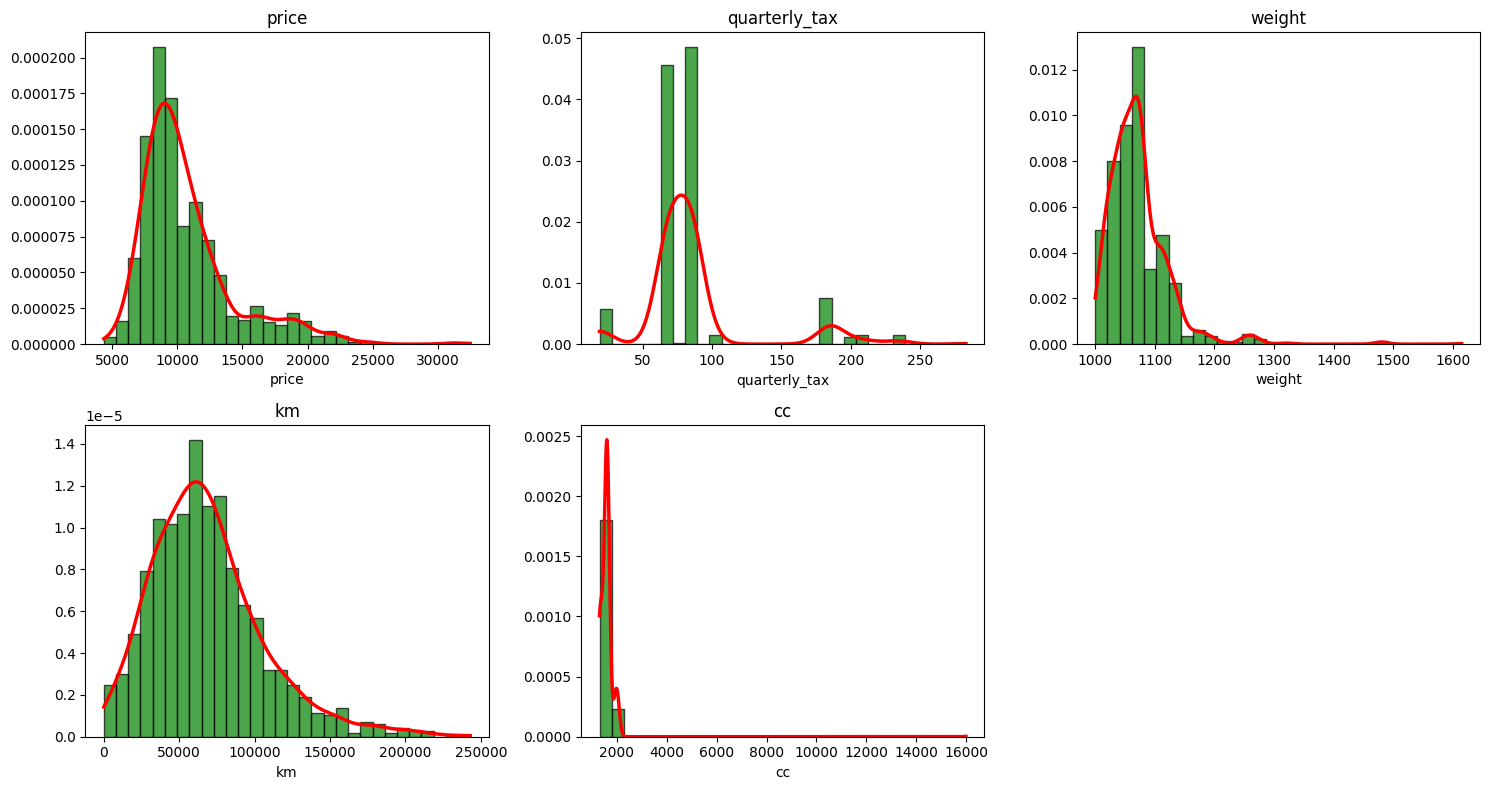

In [25]:
histogram_por_lotes(df_toyota_continuas,6)

Index(['price', 'quarterly_tax', 'weight', 'km', 'cc'], dtype='object')


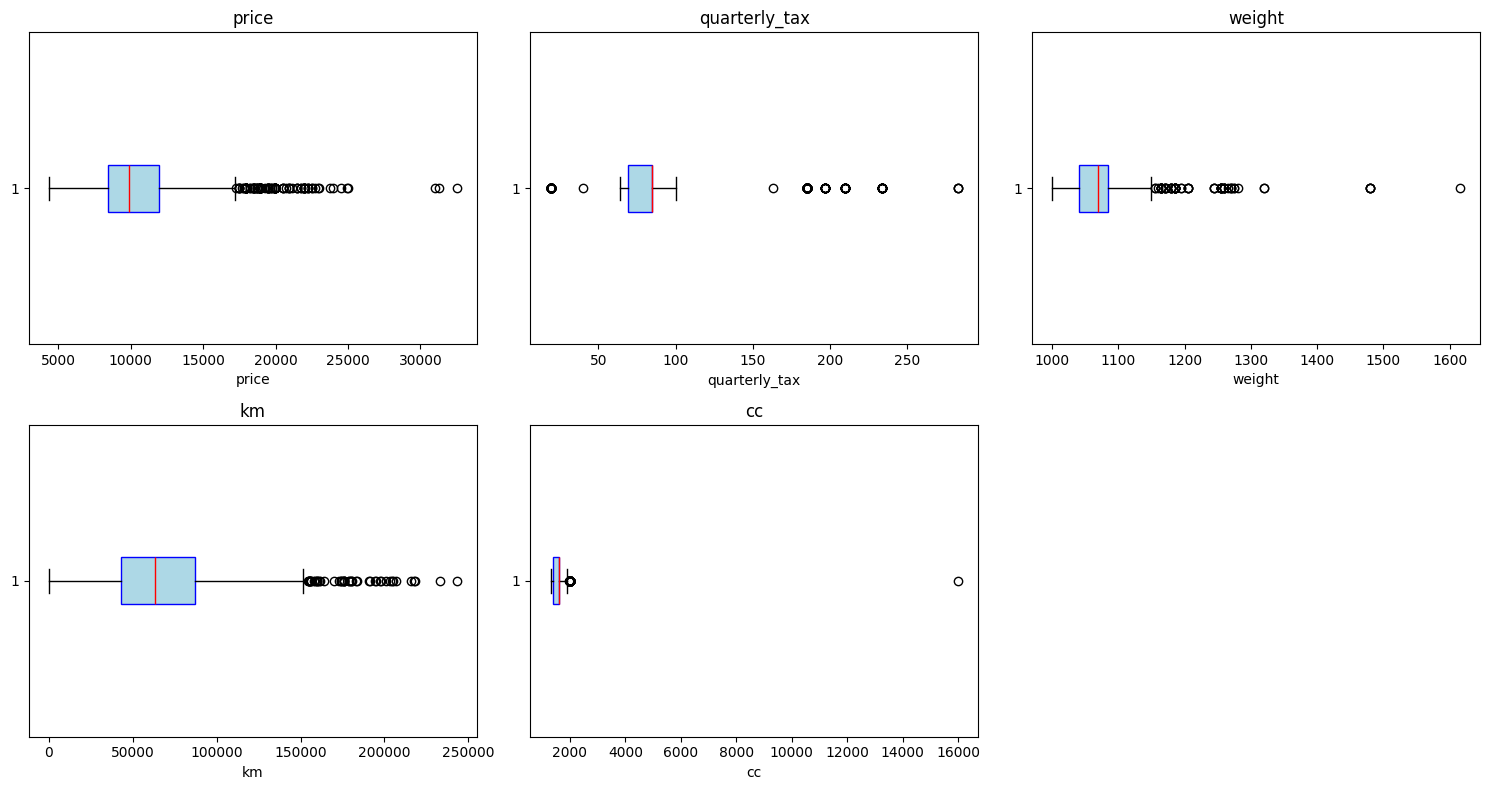

In [26]:
boxplots_por_lotes(df_toyota_continuas,6)

1. `Price (Precio)`

- Boxplot: Se observan varios valores atípicos (outliers) a la derecha, lo que indica que hay autos con precios mucho más altos que la mayoría.

- Histograma: La distribución es sesgada a la derecha, con una mayoría de autos en un rango de precios más bajos y unos pocos muy caros.

- Interpretación: La variable tiene una dispersión amplia y algunos autos que pueden ser considerados premium o muy costosos debido a funciones adicionales que el mismo lleva como ser `direccion asistida`.

2. `Quarterly Tax (Impuesto Trimestral)`

- Boxplot: También se observan outliers pero menos pronunciados que en el precio.

- Histograma: La mayoría de los autos pagan un impuesto relativamente bajo, con algunos pocos con impuestos altos.

- Interpretación: La mayoría de los autos tienen un impuesto trimestral bajo, probablemente relacionado con la cilindrada o emisiones, con algunos autos más costosos o potentes que pagan más.

3. `Weight (Peso)`

- Boxplot: Se ven outliers a la derecha, pero la mayoría de autos tienen pesos relativamente similares.

- Histograma: La distribución está más concentrada en un rango estrecho, con algunos autos más pesados.

- Interpretación: La mayoría de los autos tienen pesos homogéneos, pero hay algunos modelos o variantes más pesadas.

4. `Km (Kilometraje)`

- Boxplot: Se observan varios outliers con kilometrajes muy altos.

- Histograma: La distribución está sesgada a la derecha, con muchos autos con bajo kilometraje y unos pocos con kilometrajes muy altos.

- Interpretación: Hay autos con poca circulación y algunos con mucho uso, lo cual es importante considerar para análisis de desgaste o valor de reventa.

5. `cc (cilindrado del motor)`

- Boxplot: se obsevar outliers muy cerca del maximo del cojunto de datos pero hay uno que esta muy alejado 

- Histograma: la distribucion esta extramadamente sesgada hacia la derecha por culpa del outlier que esta muy alejado

- Interpretacion: autos con motor de bajo cilindro y hay un auto con un motor que tiene mucho cilindrado

En resumen:

- Las cuatro variables muestran distribuciones sesgadas, con presencia de valores atípicos.

- Esto sugiere que se podría considerar transformación o limpieza de outliers para análisis posteriores.

- Se debe considerar borrar la variable weight puesto no se ve relevante para predecir un precio

- importante analizar la variable `price` , `km` y `quartely tax` con las binarias para obtener conclusiones mas precisas.

- importante eliminar el outlier de `cc` ya que podria causar problemas a la hora de entrenar el modelo, si se la considera como predictora.

## Variables Enteras

In [27]:
df_toyota_enteras = df_toyota.copy()

In [28]:
df_toyota_enteras.drop(columns=['price', 'quarterly_tax', 'weight', 'km','cc'], axis=1,inplace=True)

df_toyota_enteras.head(10)

,mfg_month,mfg_year,fuel_type,hp,met_color,automatic,doors,gears,mfr_guarantee,bovag_guarantee,...,powered_windows,power_steering,radio,mistlamps,sport_model,backseat_divider,metallic_rim,radio_cassette,tow_bar,age_08_04_calculada
0,10,2002,Diesel,90,1,0,3,5,0,1,...,1,1,0,0,0,1,0,0,0,22
1,10,2002,Diesel,90,1,0,3,5,0,1,...,0,1,0,0,0,1,0,0,0,22
2,9,2002,Diesel,90,1,0,3,5,1,1,...,0,1,0,0,0,1,0,0,0,23
3,7,2002,Diesel,90,0,0,3,5,1,1,...,0,1,0,0,0,1,0,0,0,25
4,3,2002,Diesel,90,0,0,3,5,1,1,...,1,1,0,1,0,1,0,0,0,29
5,1,2002,Diesel,90,0,0,3,5,0,1,...,1,1,0,1,0,1,0,0,0,31
6,6,2002,Diesel,90,1,0,3,5,0,1,...,1,1,0,0,1,1,0,0,0,26
7,3,2002,Diesel,90,1,0,3,5,1,1,...,1,1,0,0,0,1,0,0,0,29
8,6,2002,Petrol,192,0,0,3,5,0,1,...,1,1,1,0,0,0,1,1,0,26
9,10,2002,Diesel,69,0,0,3,5,0,1,...,0,1,0,0,0,1,0,0,0,22


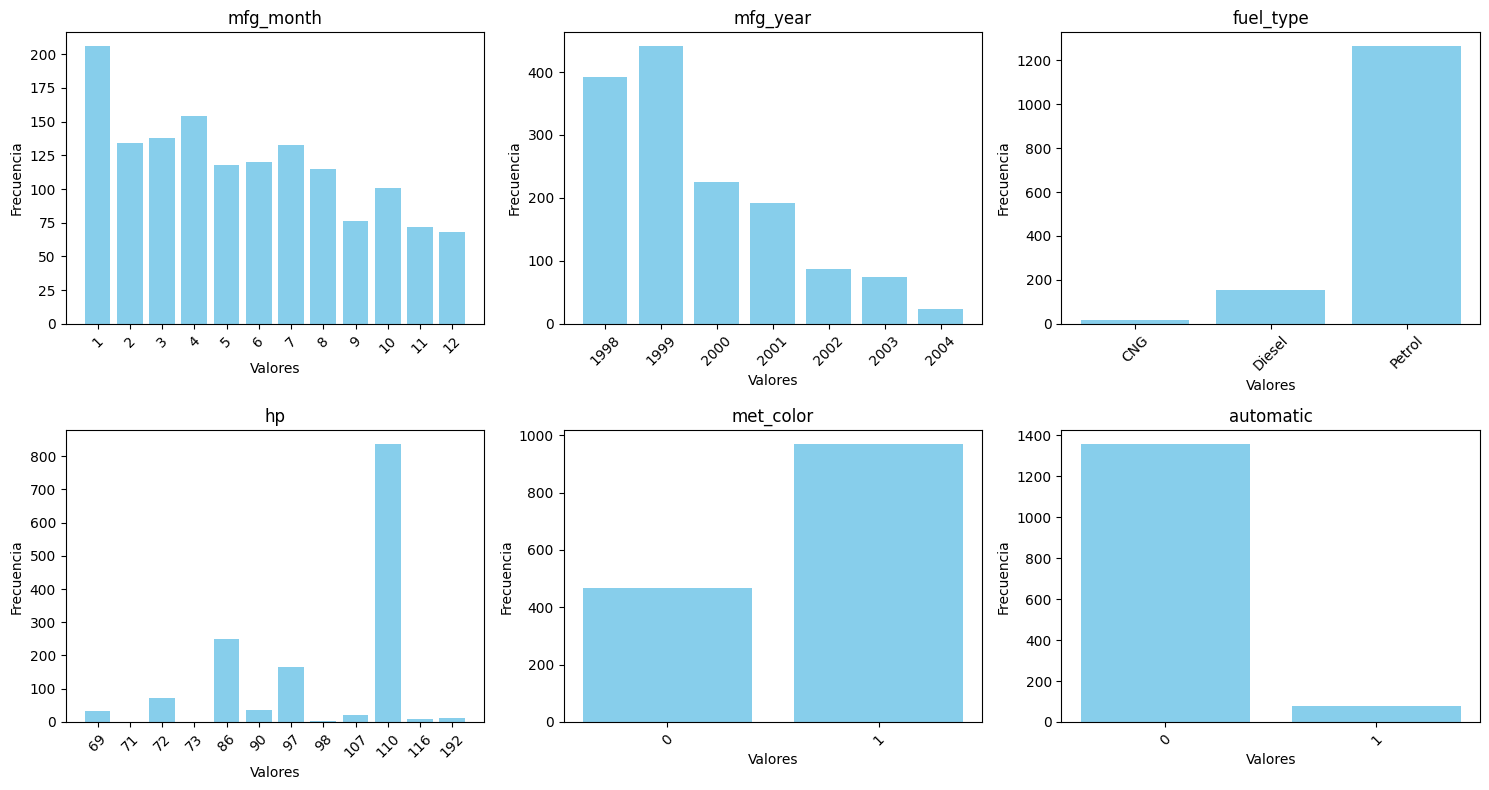

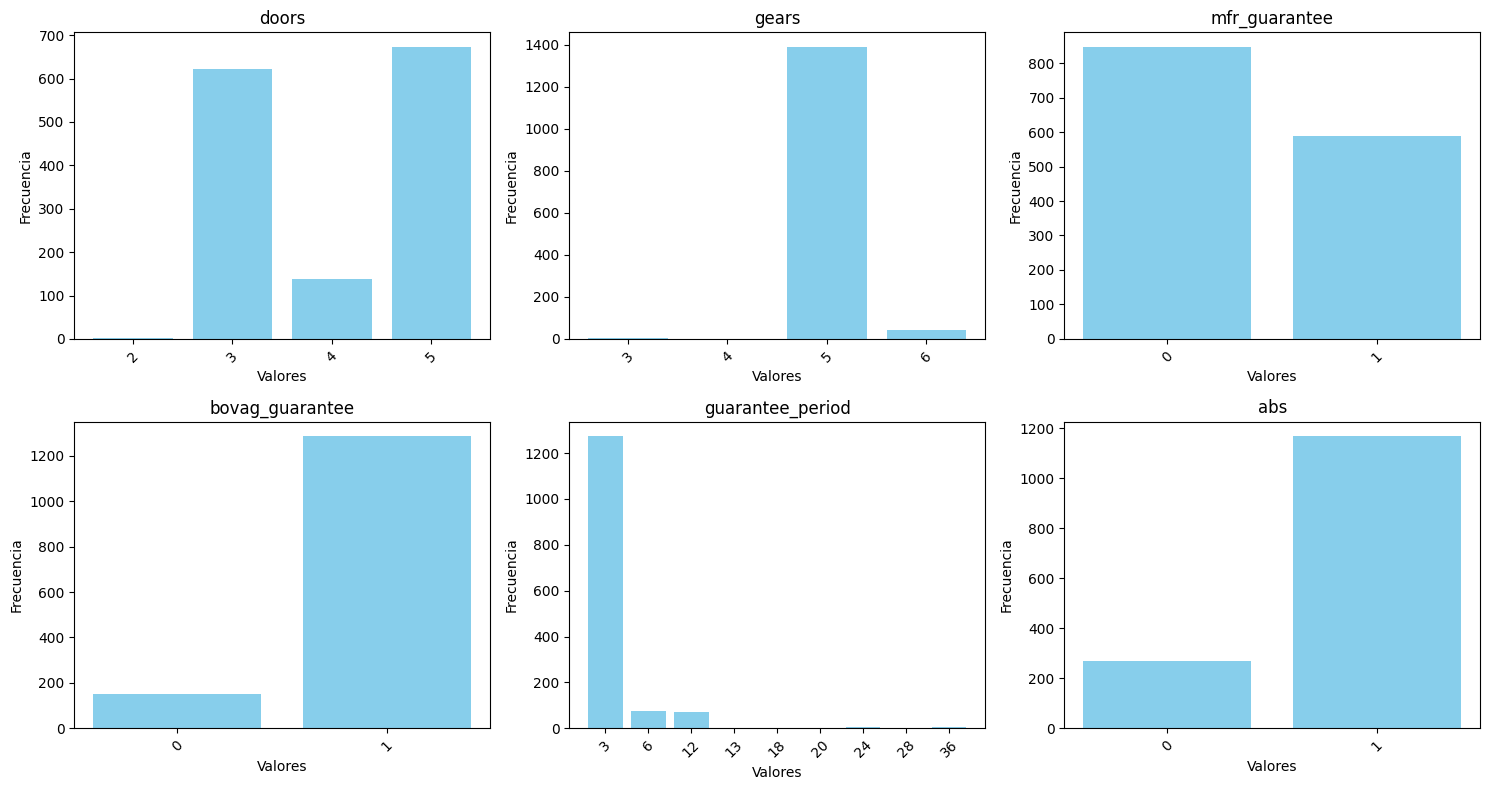

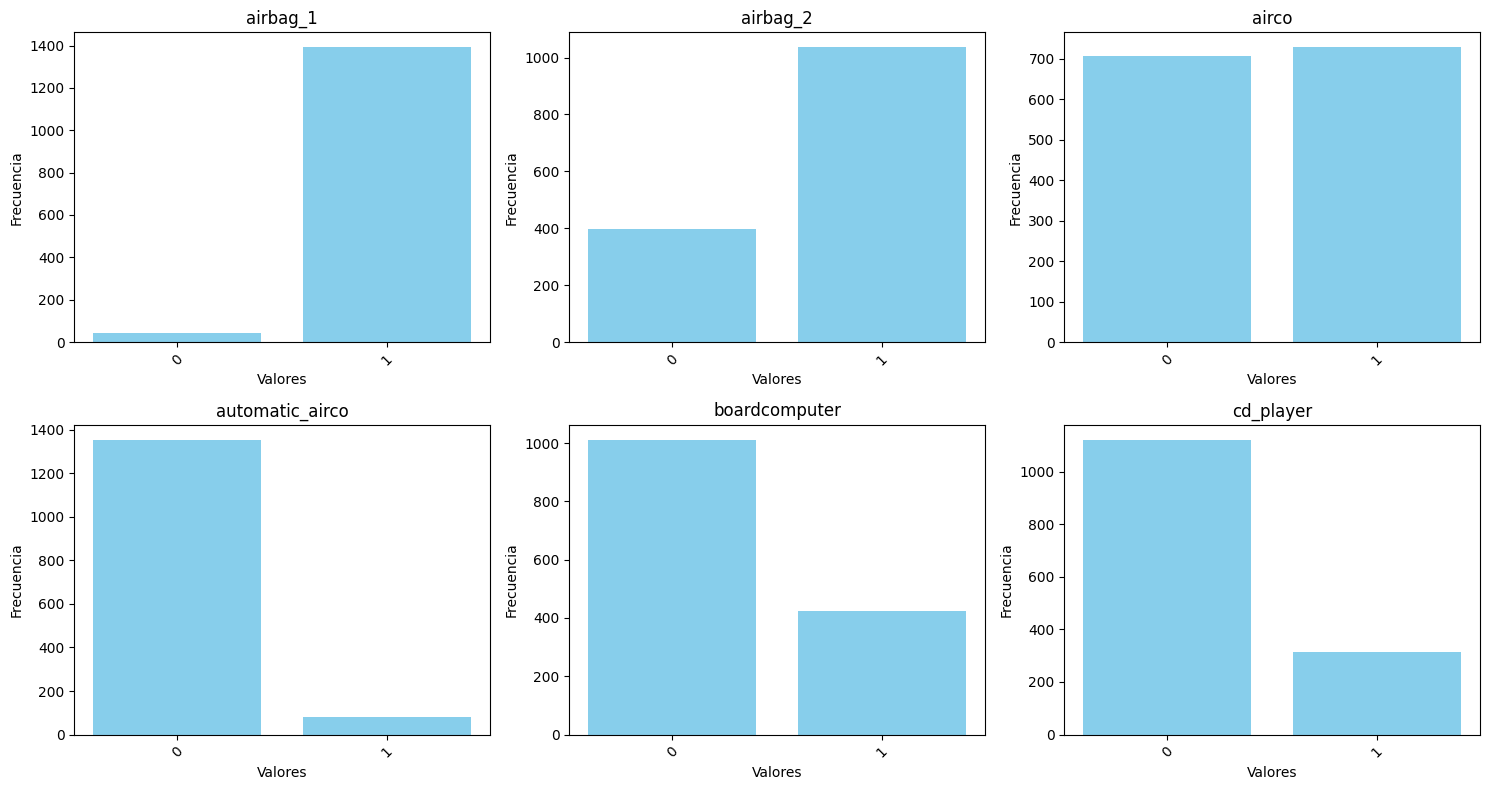

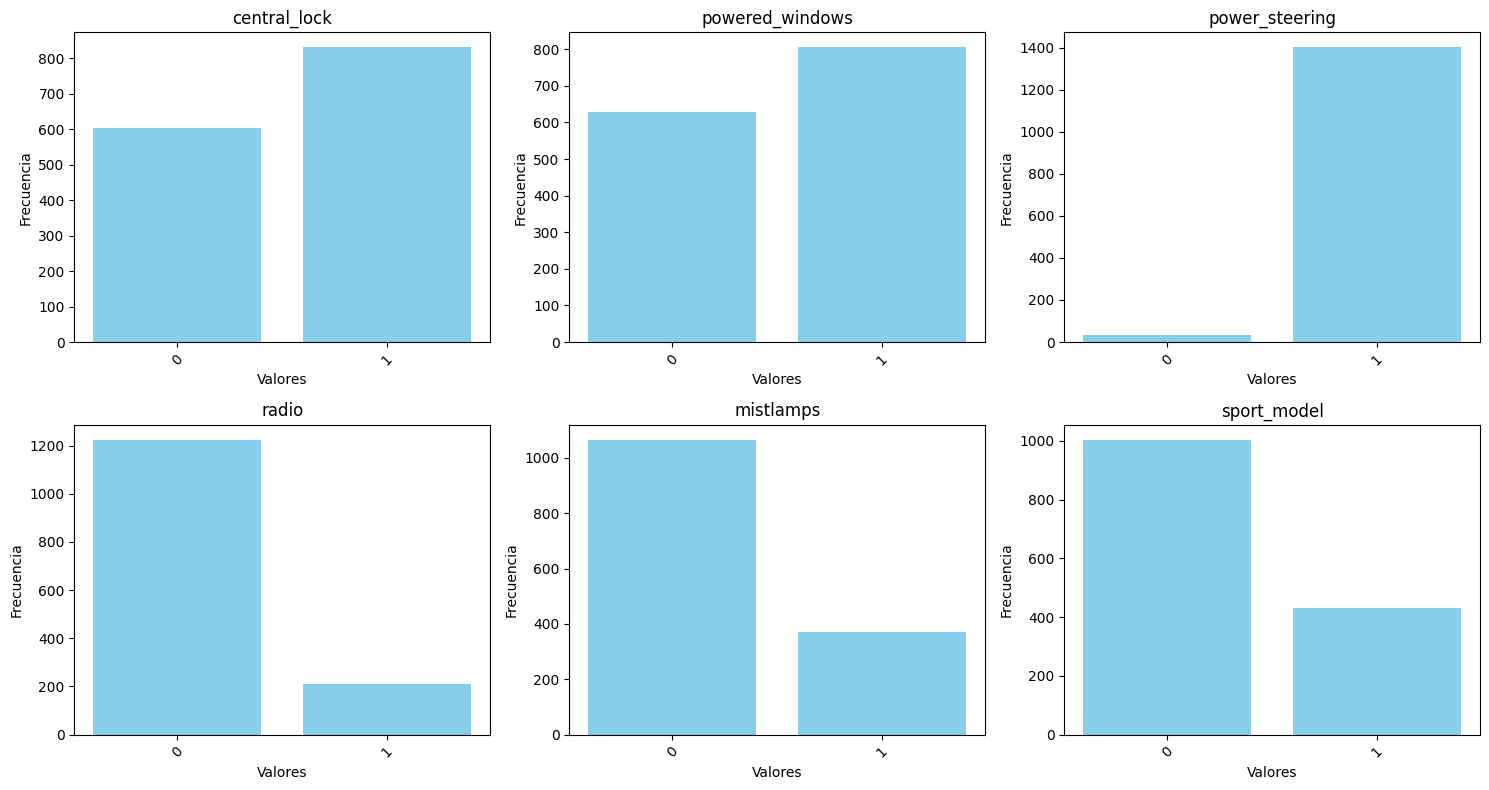

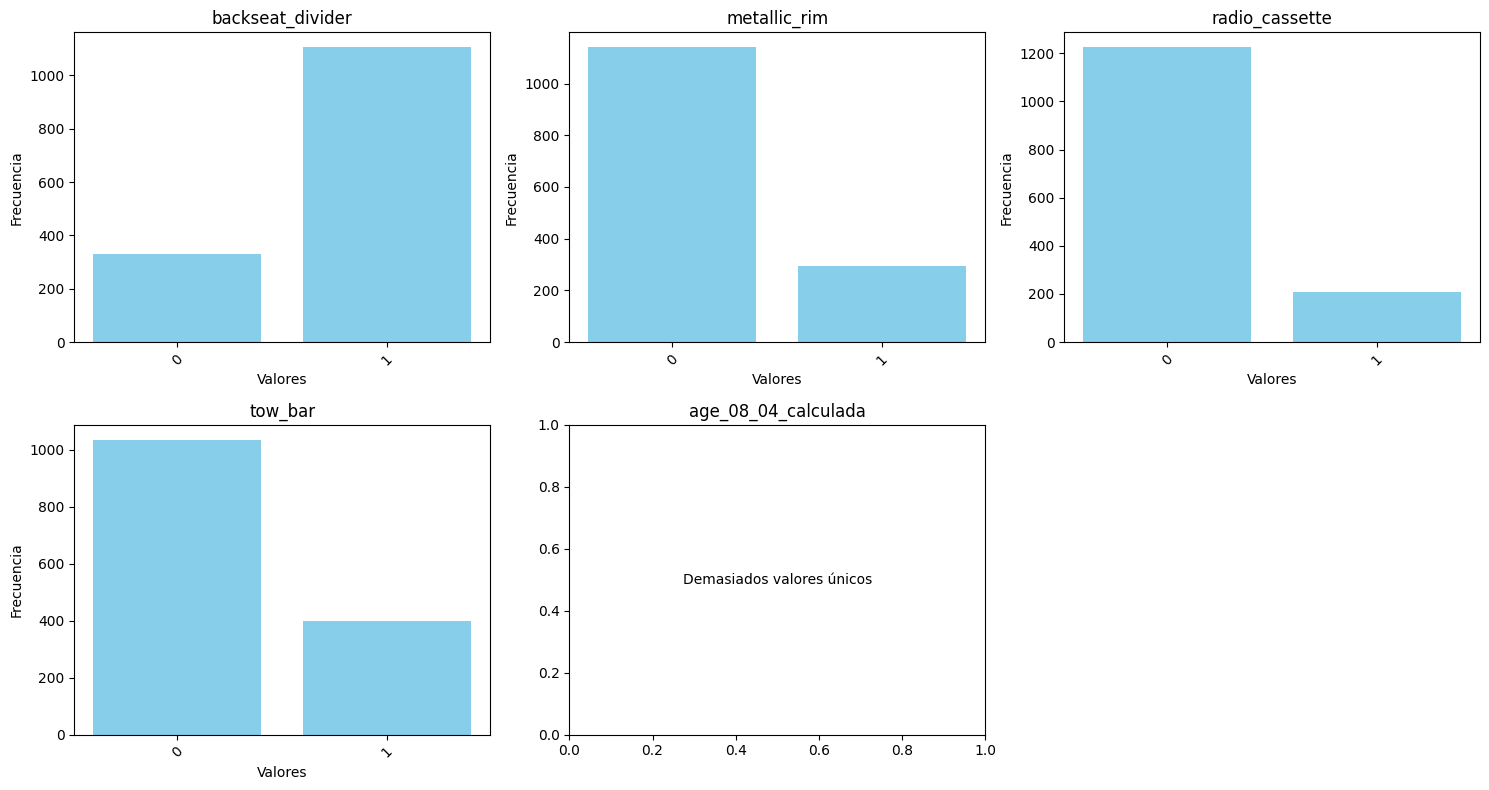

In [29]:
bar_por_lotes(df_toyota_enteras,6)

Index(['mfg_month', 'mfg_year', 'hp', 'met_color', 'automatic', 'doors',
       'gears', 'mfr_guarantee', 'bovag_guarantee', 'guarantee_period', 'abs',
       'airbag_1', 'airbag_2', 'airco', 'automatic_airco', 'boardcomputer',
       'cd_player', 'central_lock', 'powered_windows', 'power_steering',
       'radio', 'mistlamps', 'sport_model', 'backseat_divider', 'metallic_rim',
       'radio_cassette', 'tow_bar', 'age_08_04_calculada'],
      dtype='object')


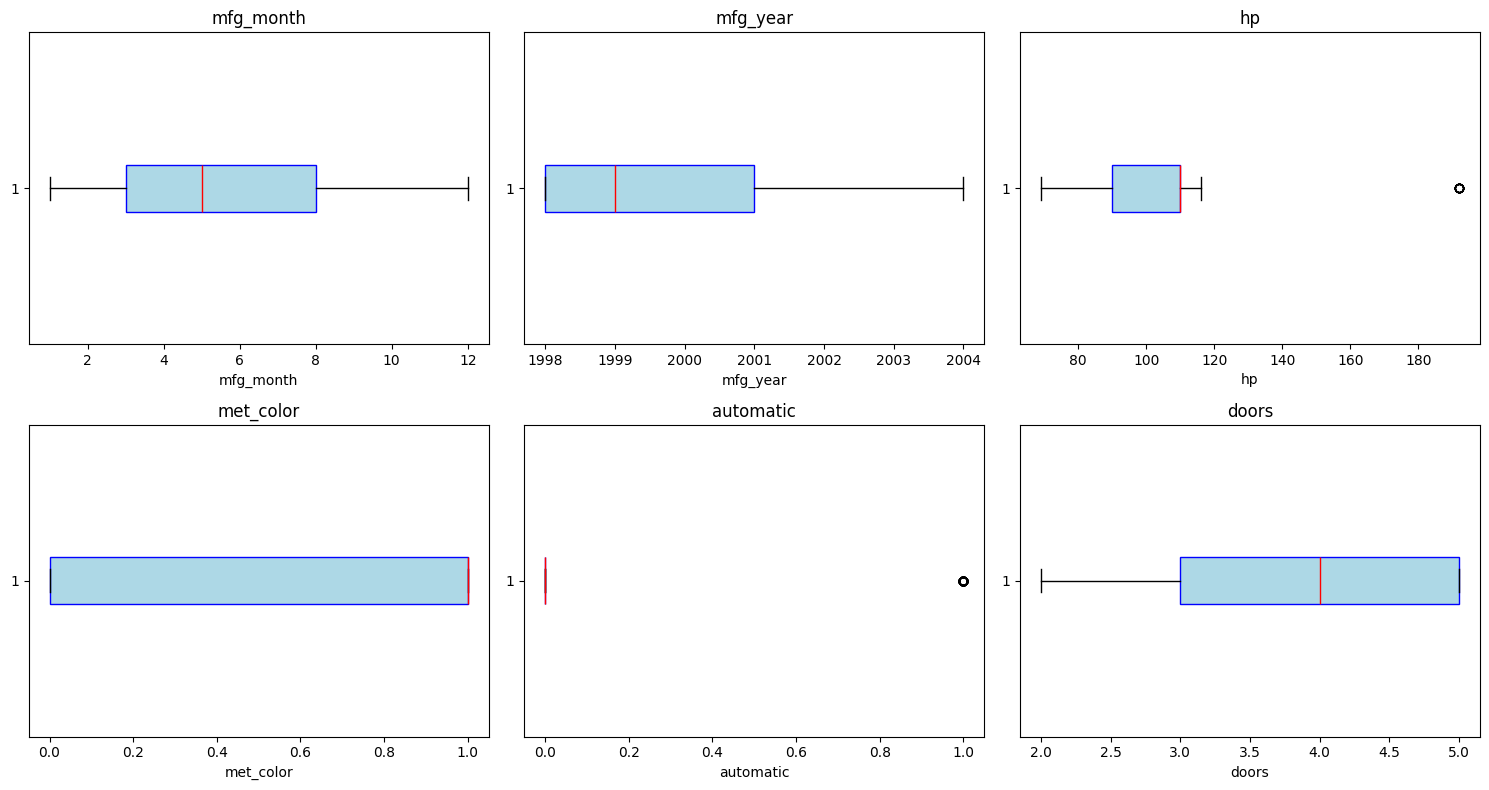

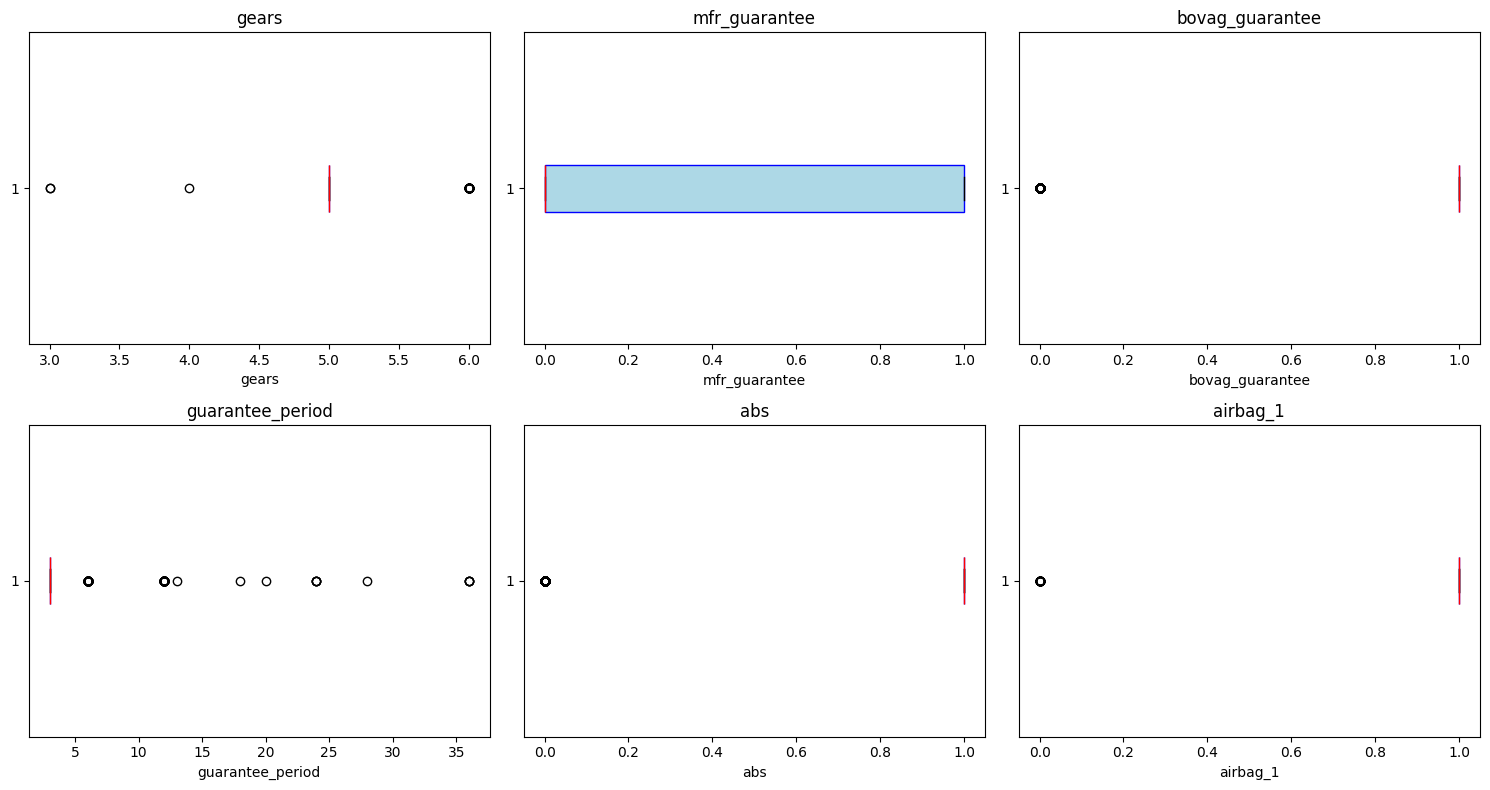

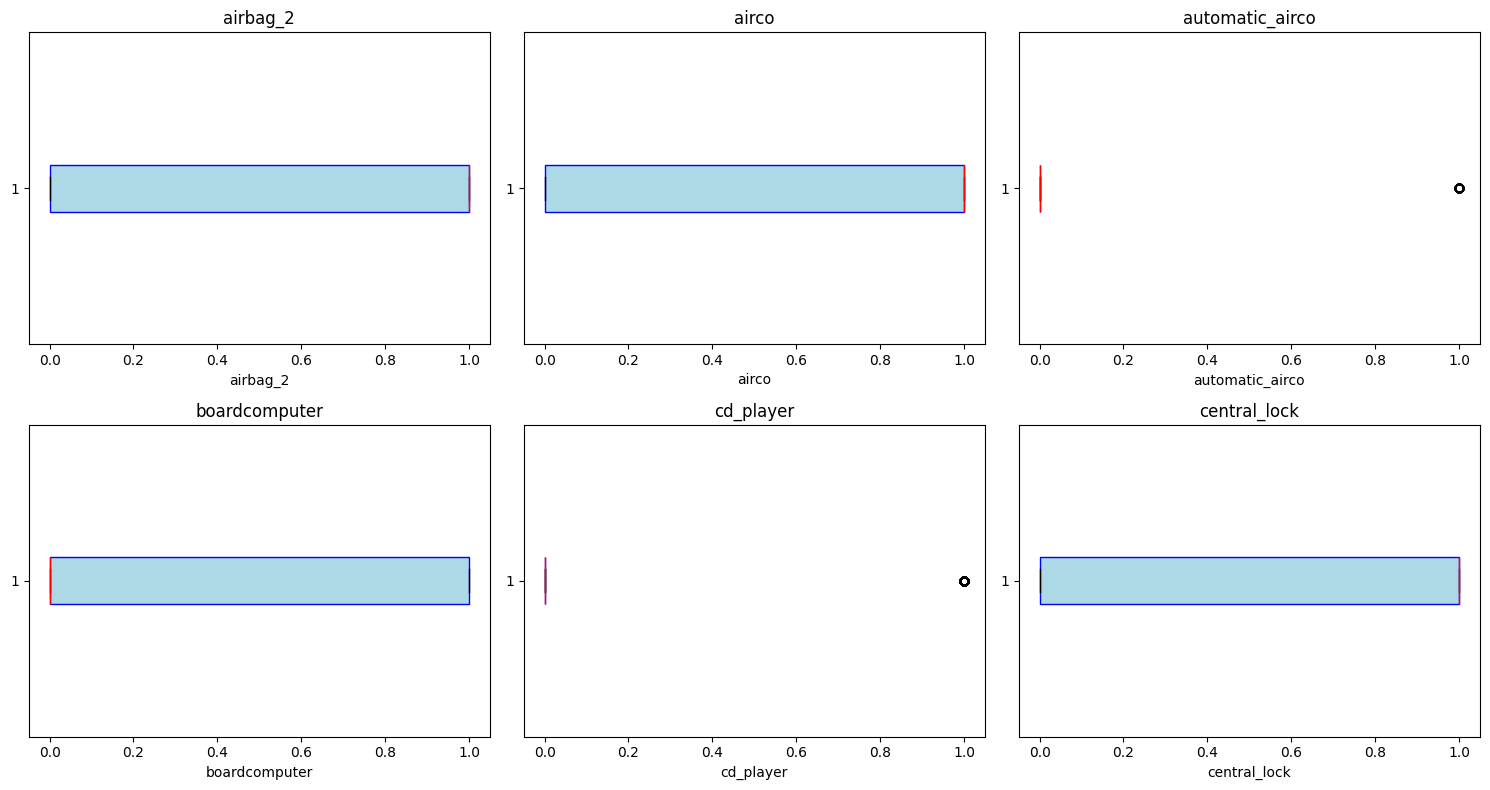

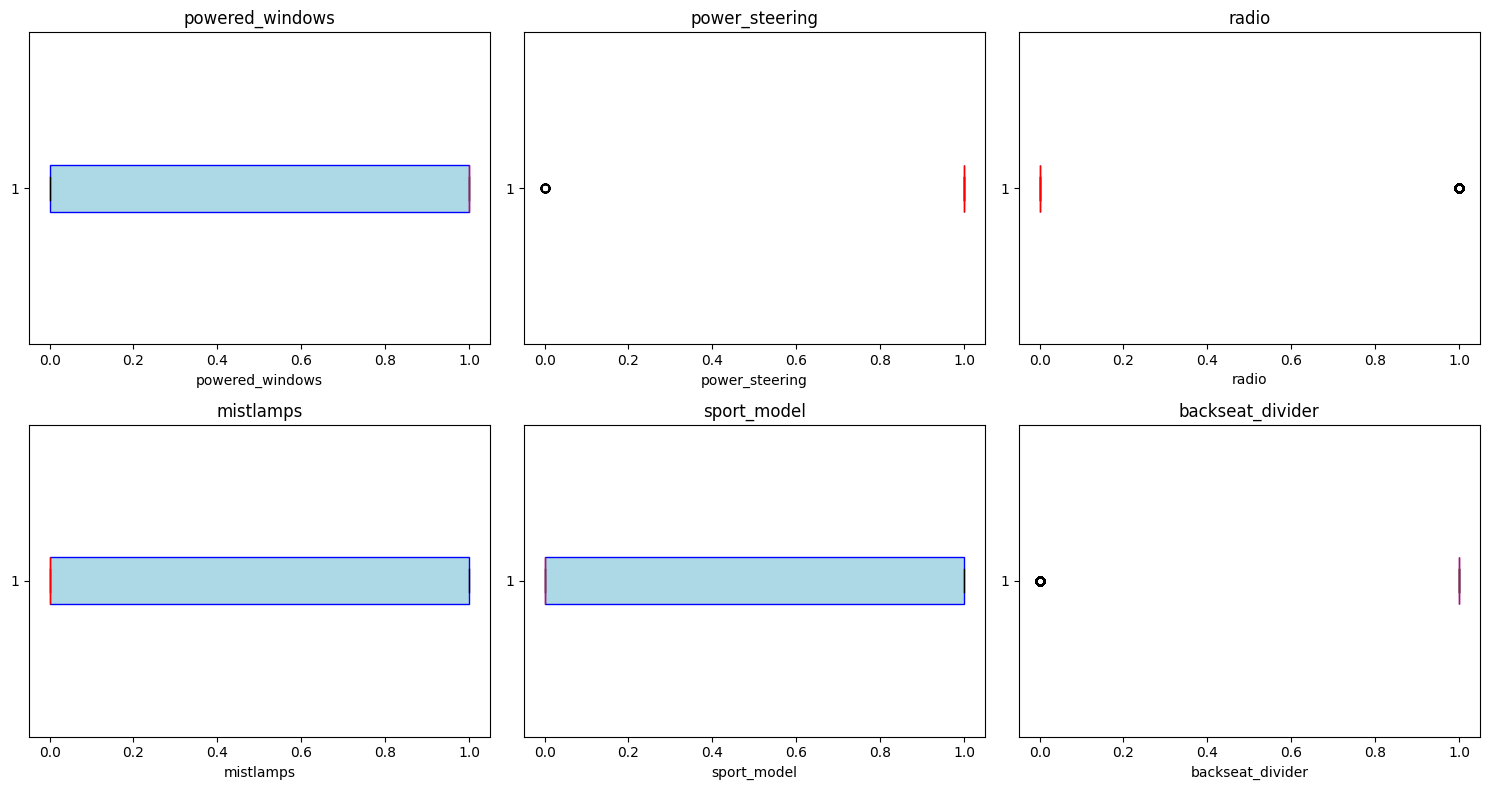

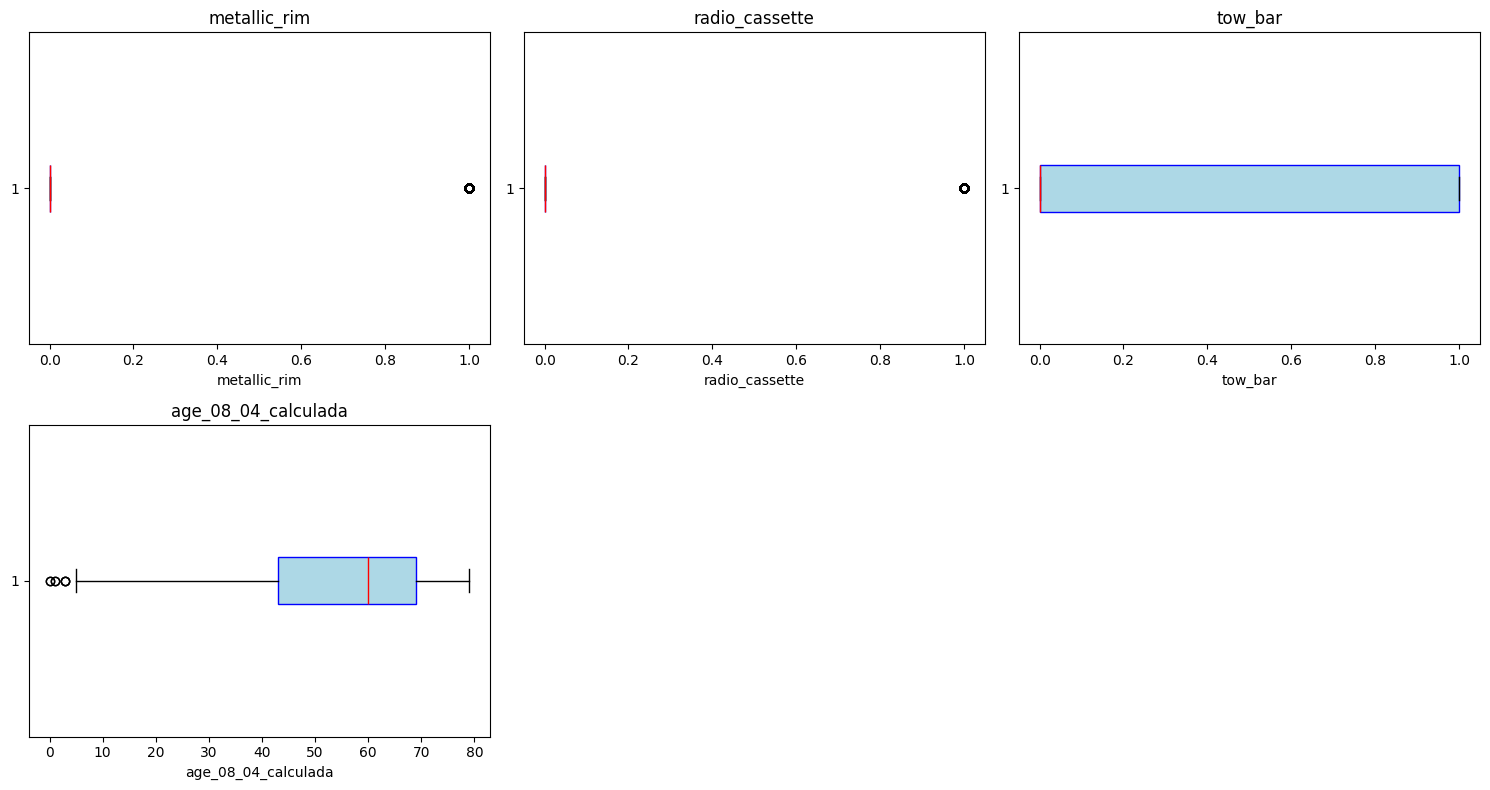

In [30]:
boxplots_por_lotes(df_toyota_enteras,6)

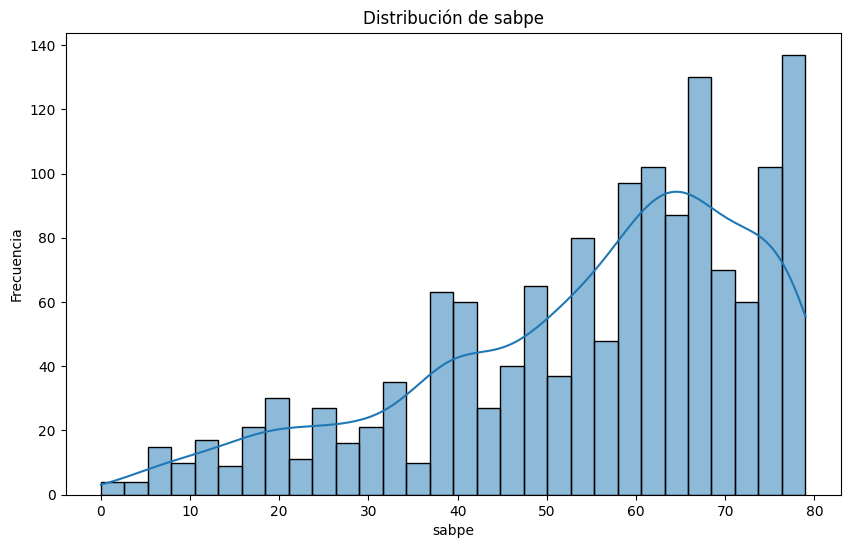

In [31]:
histogram(df_toyota_enteras['age_08_04_calculada'],'sabpe')

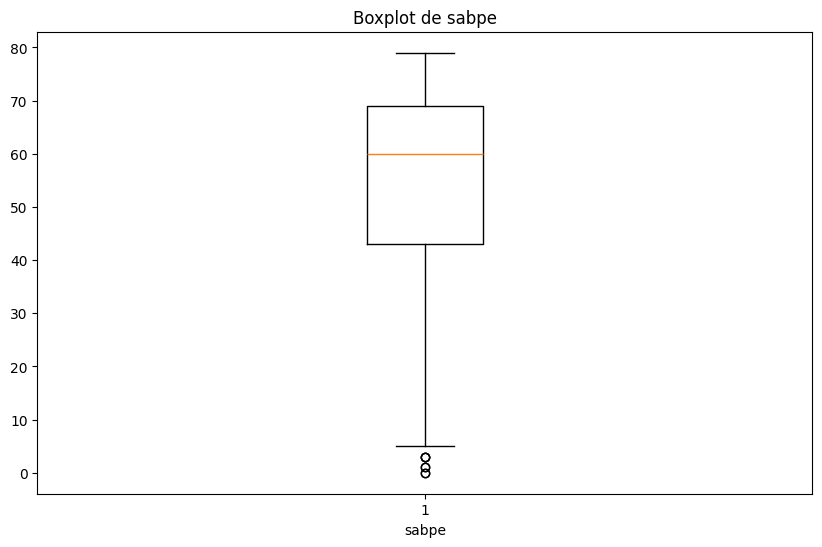

In [32]:
boxplot(df_toyota_enteras['age_08_04_calculada'],'sabpe')

# Analisis Bivariado

In [33]:
from sklearn.preprocessing import LabelEncoder

df_toyota['fuel_type_encoded'] = LabelEncoder().fit_transform(df_toyota['fuel_type'])

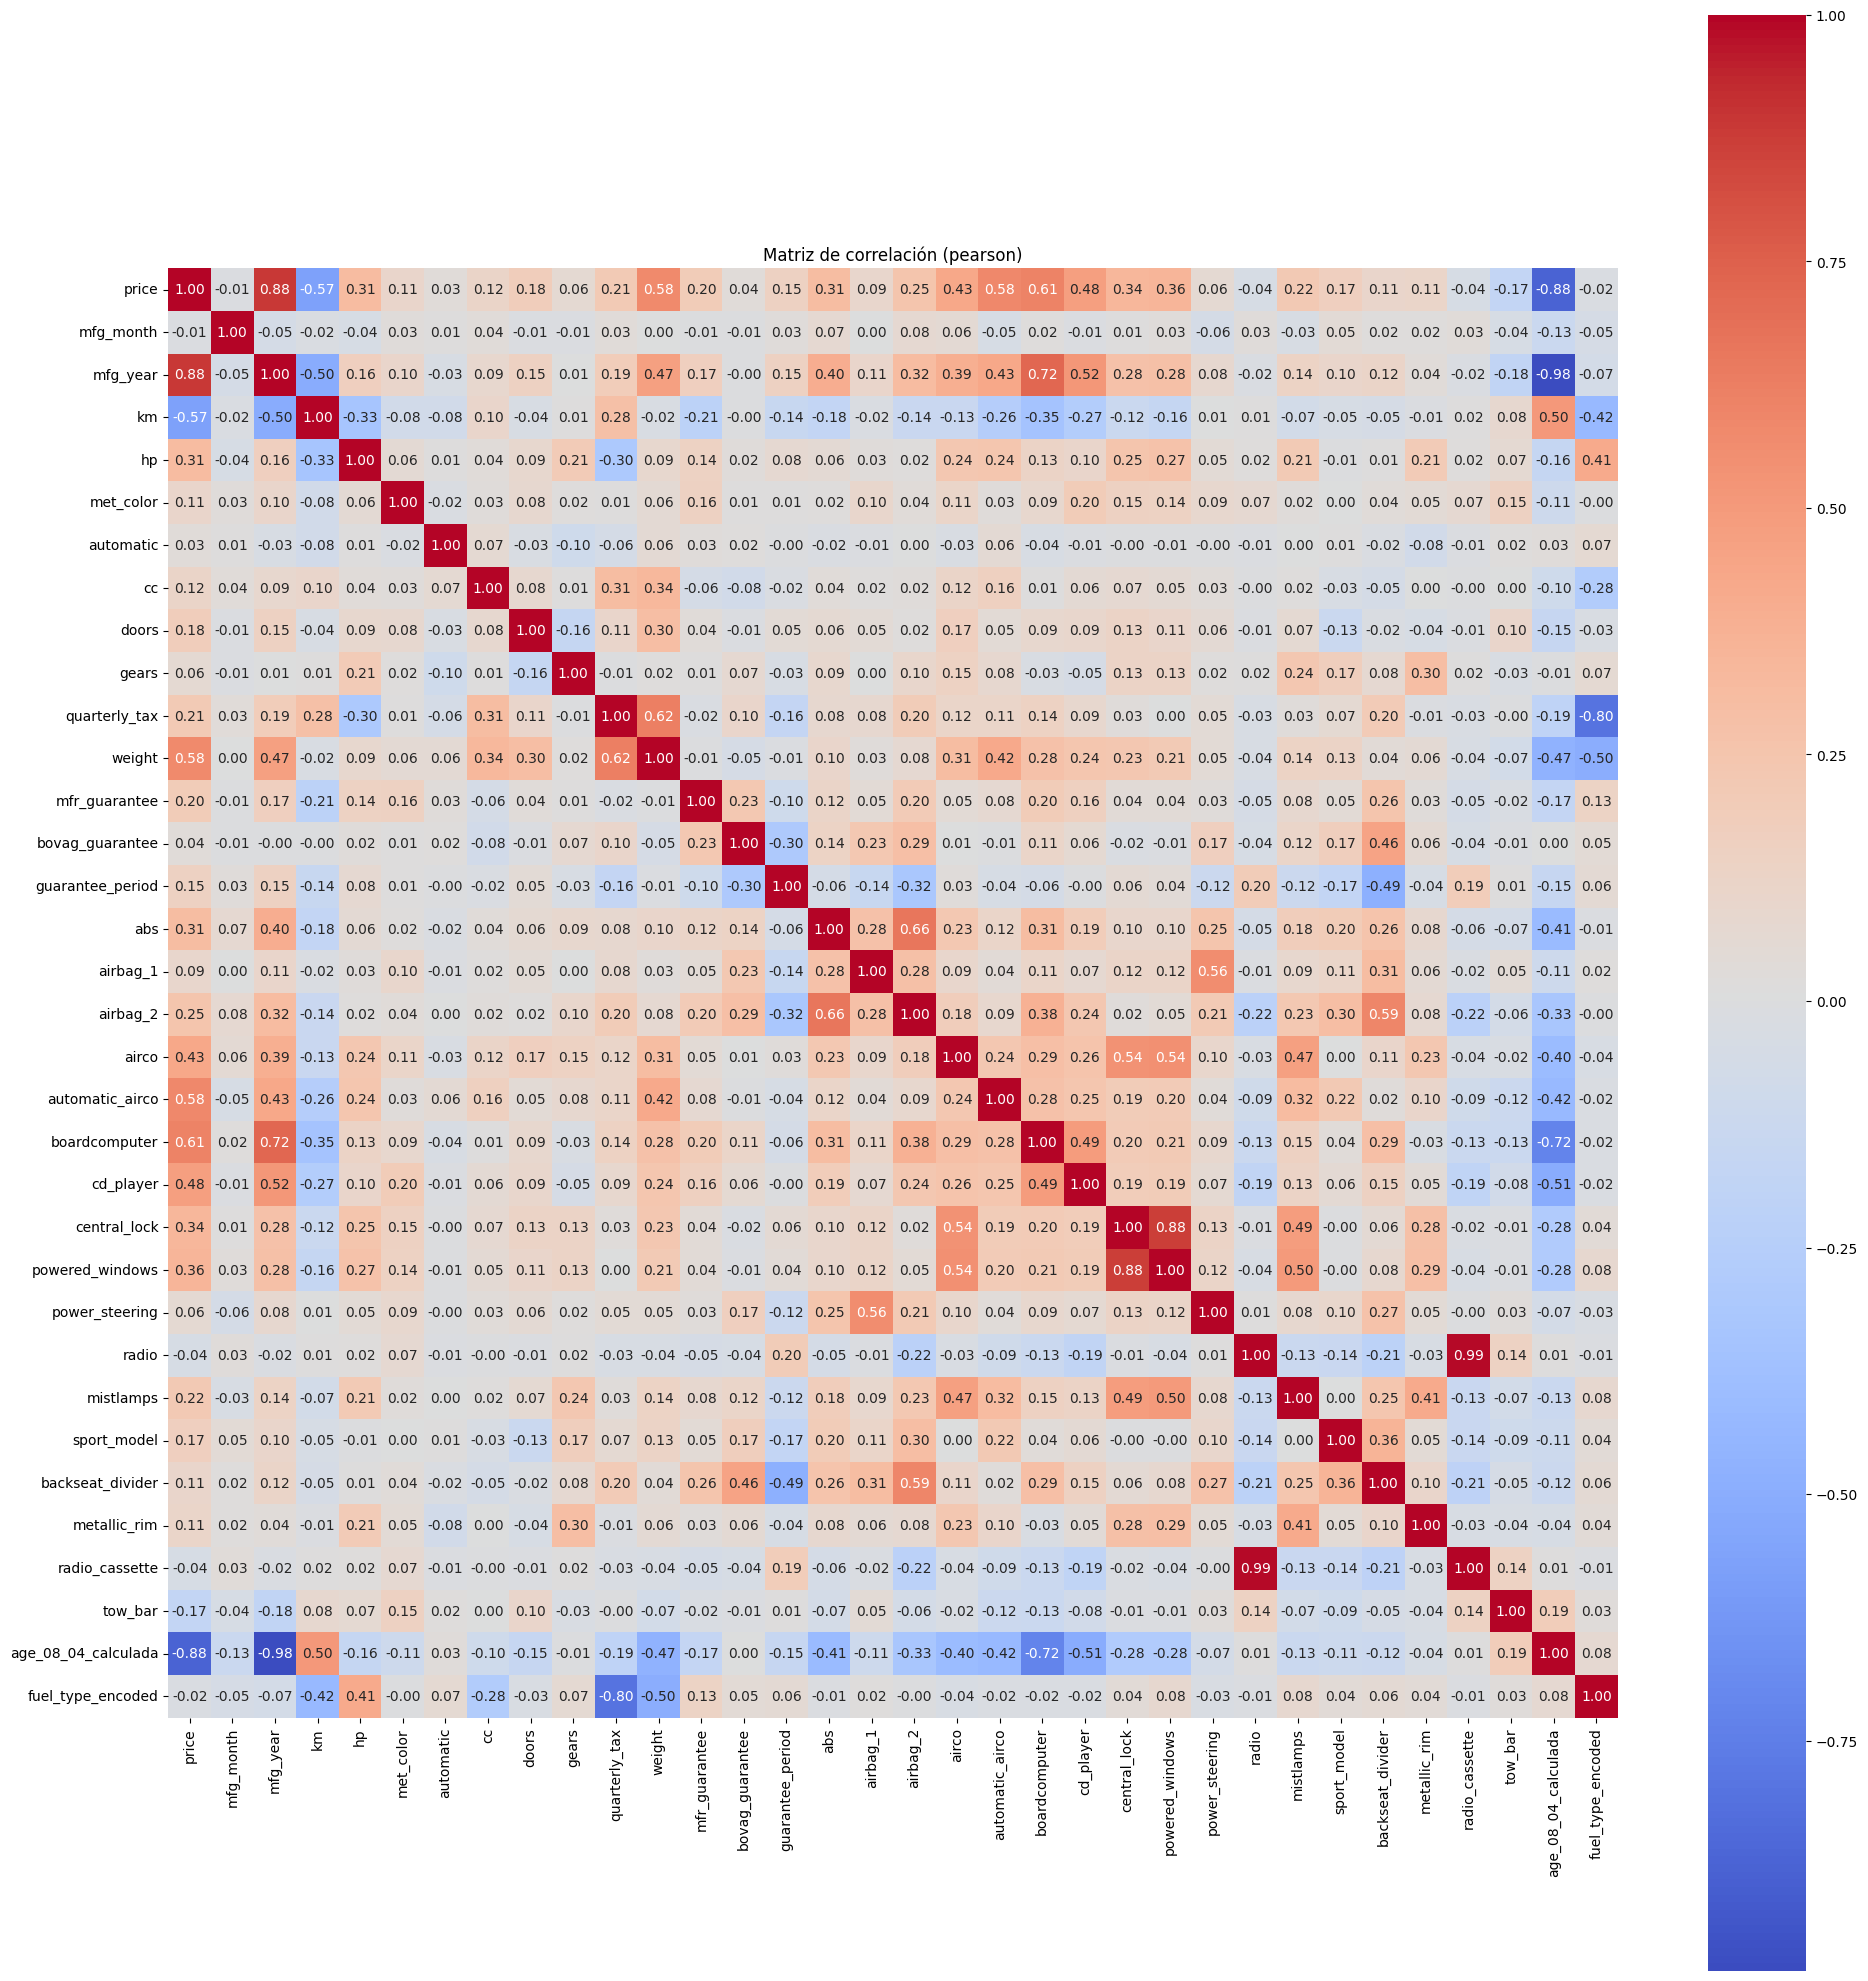

In [34]:
matriz=mostrar_matriz_correlacion(df_toyota)

Interpretación del Coeficiente de Correlación de Pearson
Los valores del coeficiente de Pearson oscilan entre -1 (correlación negativa perfecta) y 1 (correlación positiva perfecta). Un valor cercano a 0 indica ausencia de correlación lineal.

Análisis de los pares de variables:
1. `radio y radio_cassette (0.992)`

- Correlación positiva casi perfecta. Ambas variables están fuertemente relacionadas, lo que sugiere redundancia. Podría eliminarse una para evitar multicolinealidad en modelos.

2. `mfg_year y age_08_04_calculada (-0.984)`

- Correlación negativa casi perfecta. A mayor año de fabricación (mfg_year), menor edad del vehículo (age_08_04_calculada), lo cual es lógico.

3. `price y mfg_year (0.885)`

- Fuerte correlación positiva. Vehículos más nuevos tienden a ser más caros.

4. `price y age_08_04_calculada (-0.876)`

- Fuerte correlación negativa. Vehículos más antiguos tienen precios más bajos (depreciación).

5. `central_lock y powered_windows (0.875)`

- Fuerte correlación positiva. Ambas características suelen aparecer juntas en vehículos de gamas similares.

6. `quarterly_tax y fuel_type_encoded (-0.798)`

- Fuerte correlación negativa. El tipo de combustible podría influir en el impuesto trimestral (ej. combustibles más eficientes pagan menos).

7. `mfg_year y boardcomputer (0.724)`

- Correlación positiva moderada-fuerte. Vehículos recientes suelen incluir computadora de abordo.

8. `boardcomputer y age_08_04_calculada (-0.722)`

- Correlación negativa moderada-fuerte. Vehículos antiguos tienen menos probabilidad de incluir computadora de abordo.

9. `abs y airbag_2 (0.662)`

- Correlación positiva moderada. Ambas son características de seguridad que suelen coexistir en vehículos de gama alta.

conclusiones :

- Evitar multicolinealidad: Si dos variables están muy correlacionadas  considera eliminar una o usar una tecnica PCA




para evitar multicolinealidad en la selccion de feature se va eliminar las siguientes variables:

- `mfg_year` que tiene alta correlacion con age_08_04_calculada, ademas age_04_08 calculada expresa mejor la edad del vehiculo

- `radio_cassete` las dos tienen tienen las misma correlacion con la target asi como borramos radio casset

- `central lock`  ya que powered_windows tiene mas correlacion con la target

- `board computer` ya que age_08_04_calculada tiene mejor correlacion con la target

- `airbag2`   ya que abs tiene mejor correlacion con la target

- `fuel type` ya que los imopuestos tienemejor correlacion con la target

In [35]:
pares=pares_correlacion_altas(matriz)

pares

,Variable_1,Variable_2,Correlación
0,radio,radio_cassette,0.991620
1,mfg_year,age_08_04_calculada,-0.983601
2,price,mfg_year,0.884627
3,price,age_08_04_calculada,-0.876273
4,central_lock,powered_windows,0.875488
5,quarterly_tax,fuel_type_encoded,-0.797644
6,mfg_year,boardcomputer,0.723989
7,boardcomputer,age_08_04_calculada,-0.722390
8,abs,airbag_2,0.661700


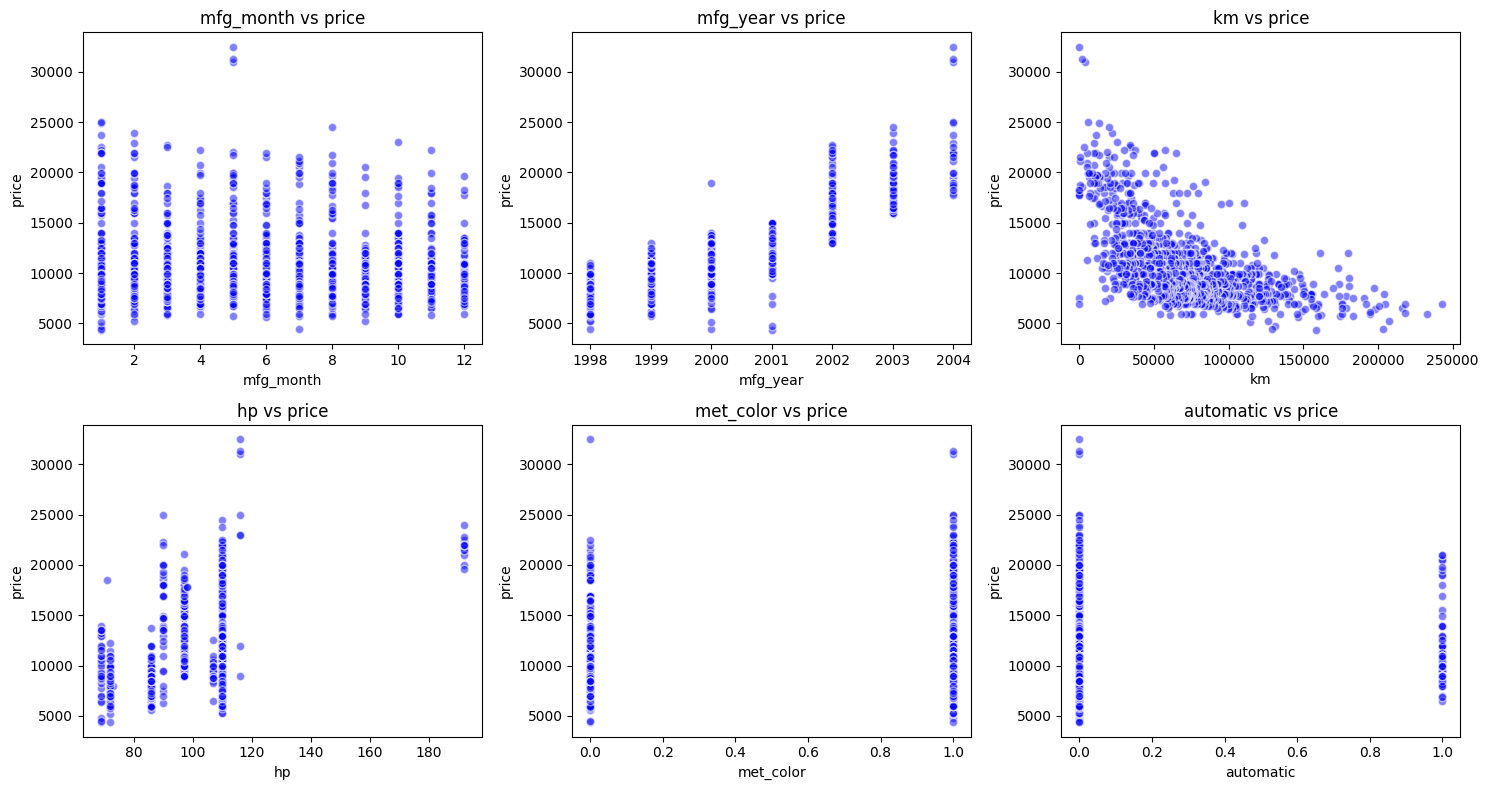

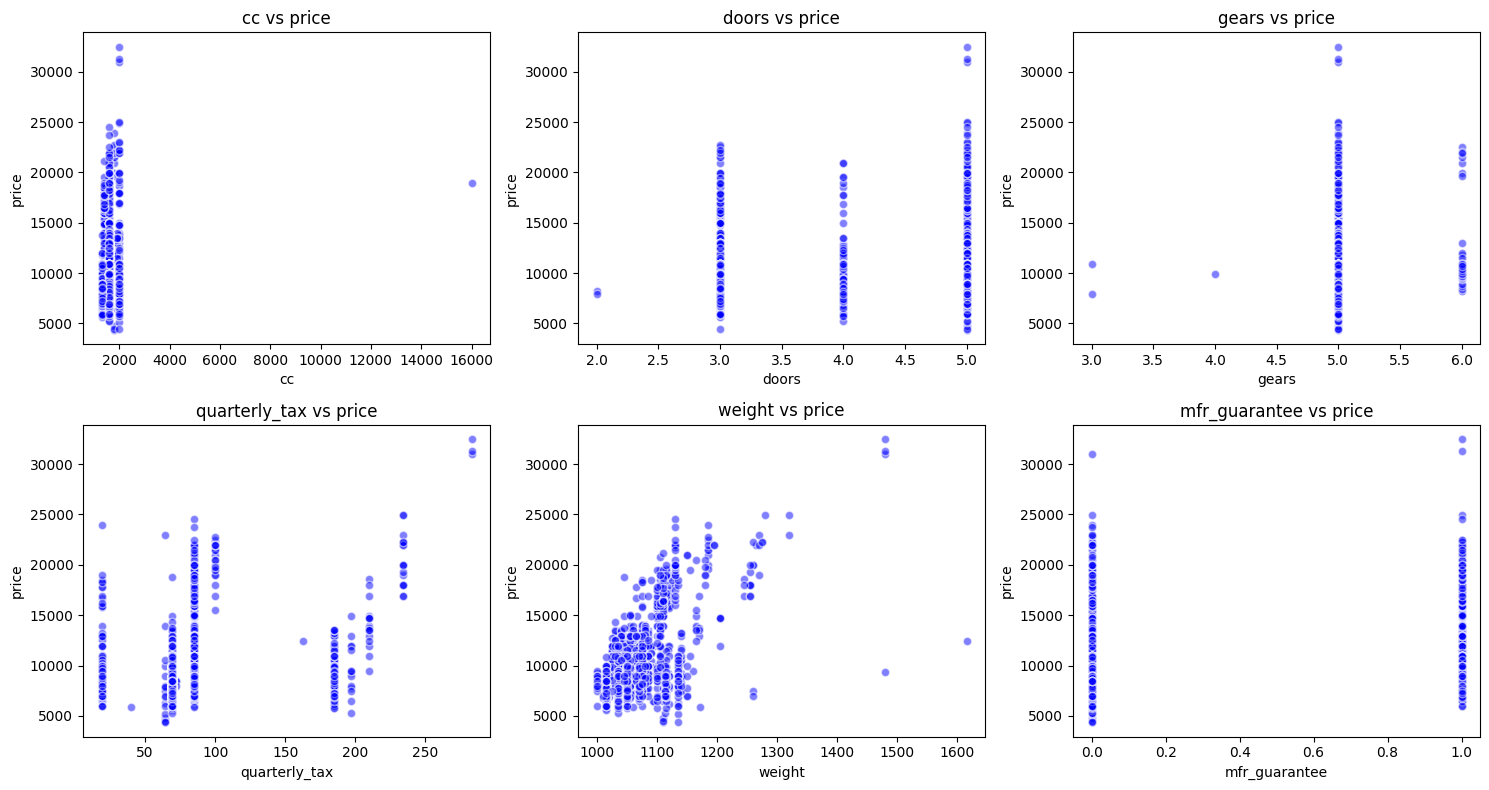

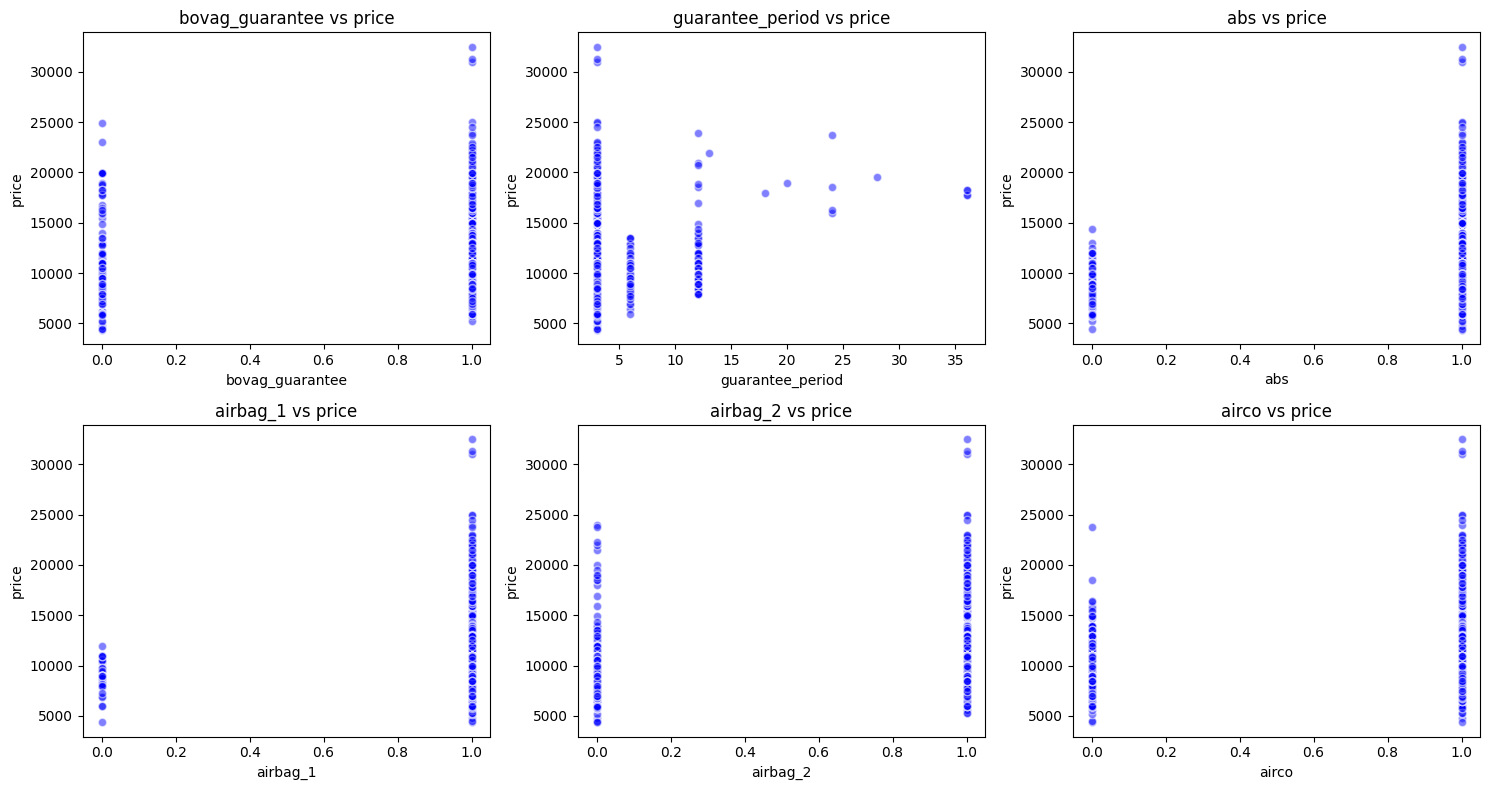

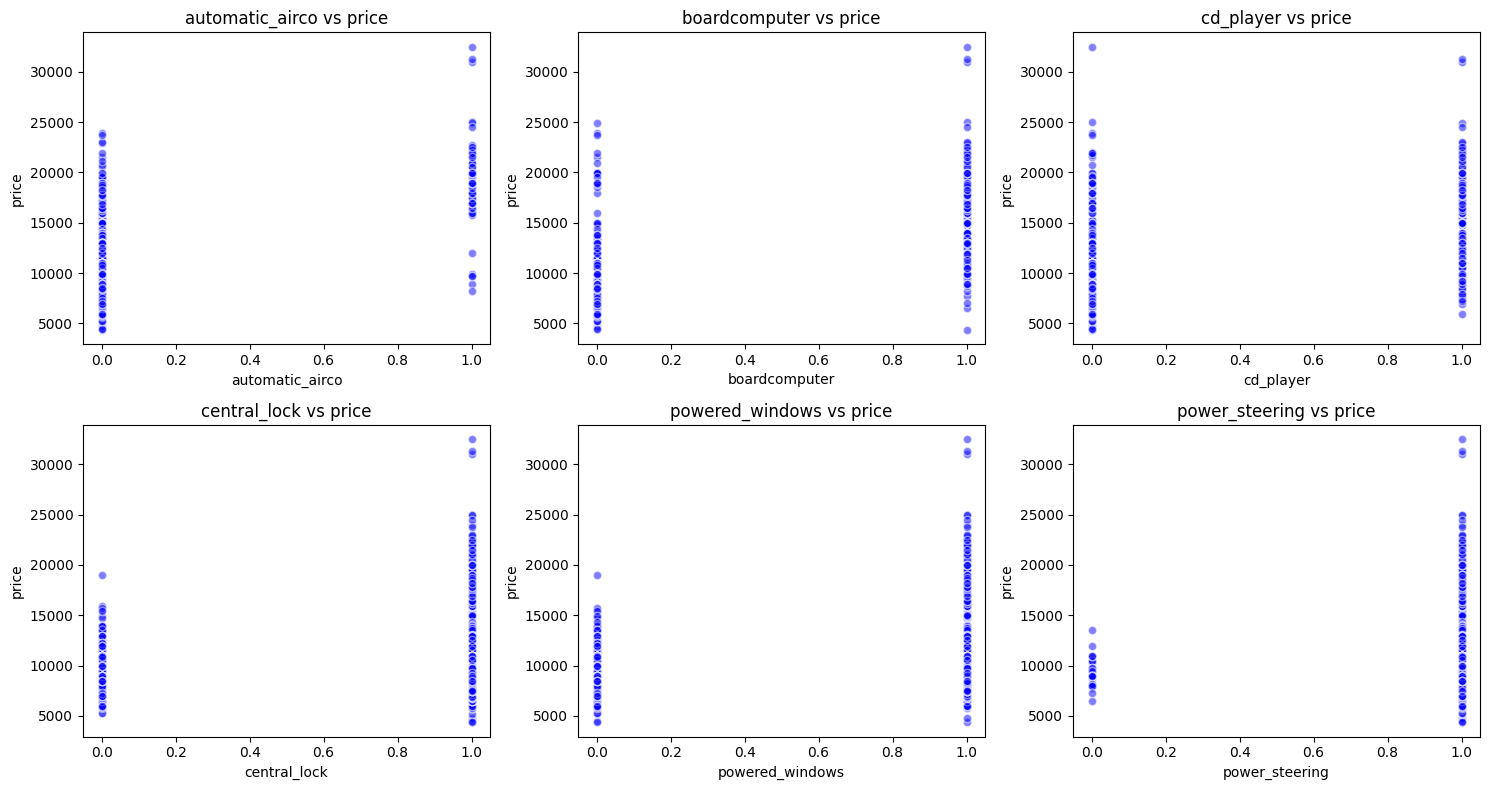

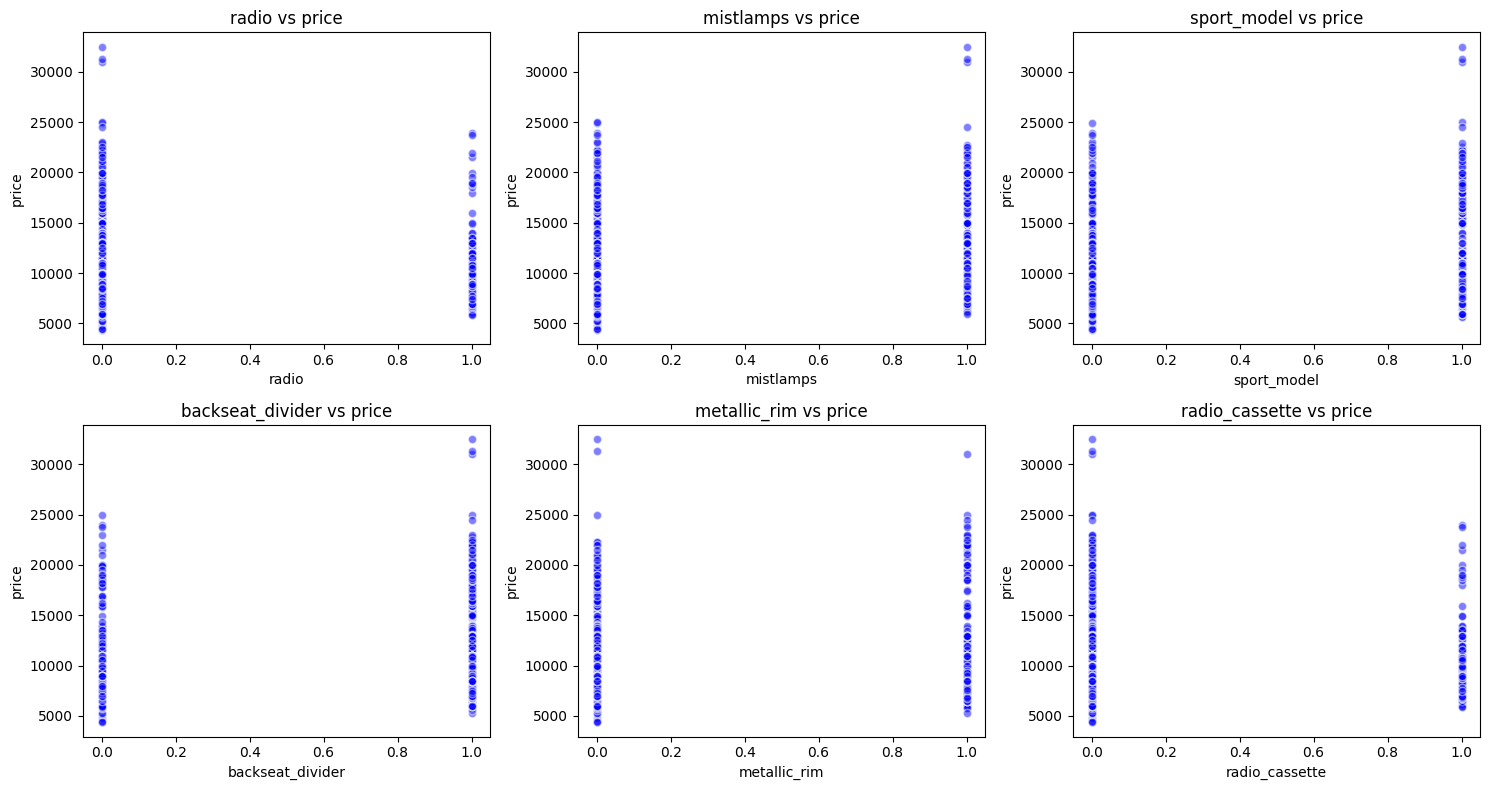

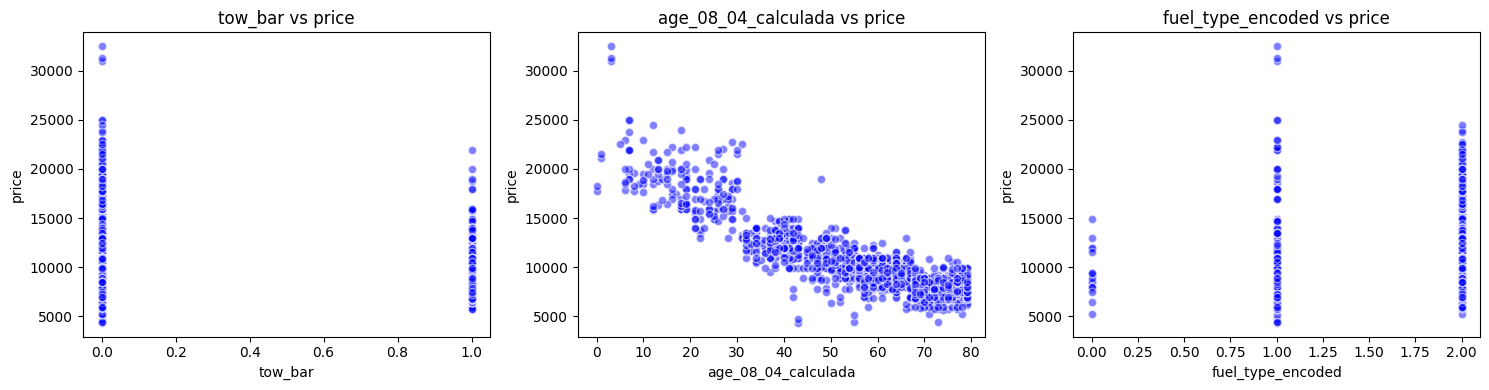

In [36]:
scatter_por_lotes(df_toyota)

# Eliminacion de outliers

## Price

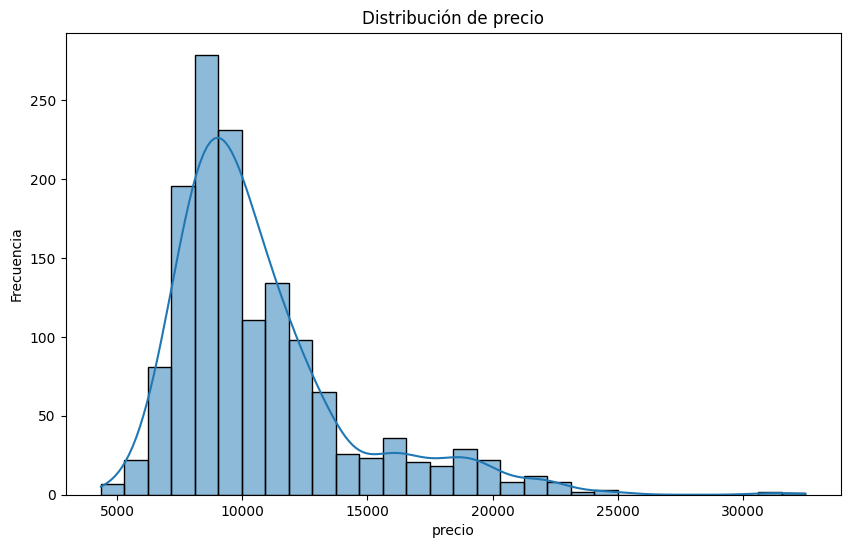

In [37]:
histogram(df_toyota['price'],'precio')

al ser una distrubucion aproximada a la normal le aplicaremos z-core para eliminar de outliers a dos desviaciones estandar

Cantidad de outliers: 100


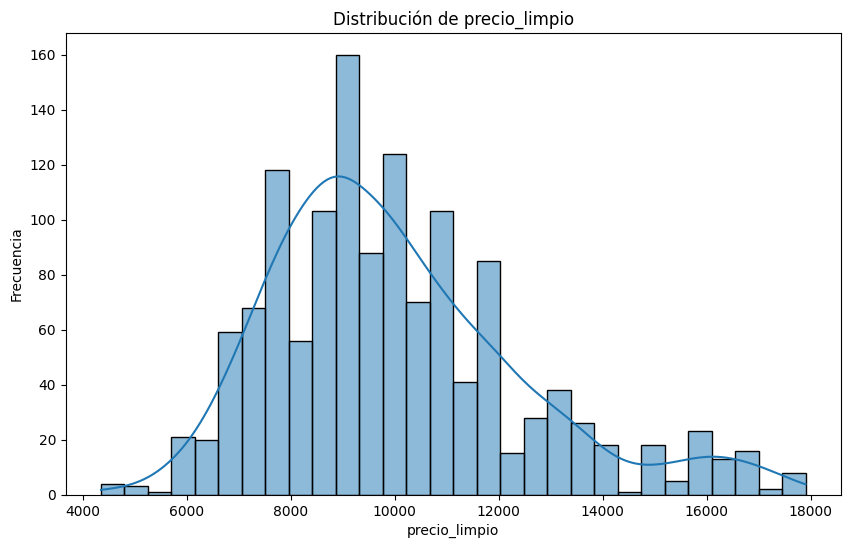

In [38]:
price = df_toyota['price'].copy()
price_limpio, mask_price = limpiar_outliers_z_core(price)

print('Cantidad de outliers:', len(price) - len(price_limpio))

histogram(price_limpio,'precio_limpio')

## age_08_04_calculada

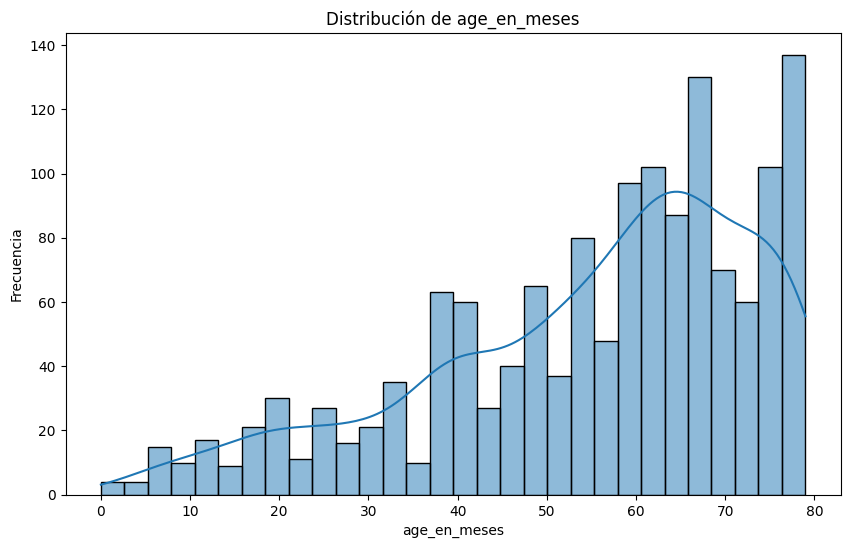

In [39]:
histogram(df_toyota['age_08_04_calculada'],'age_en_meses')

Cantidad de outliers: 67


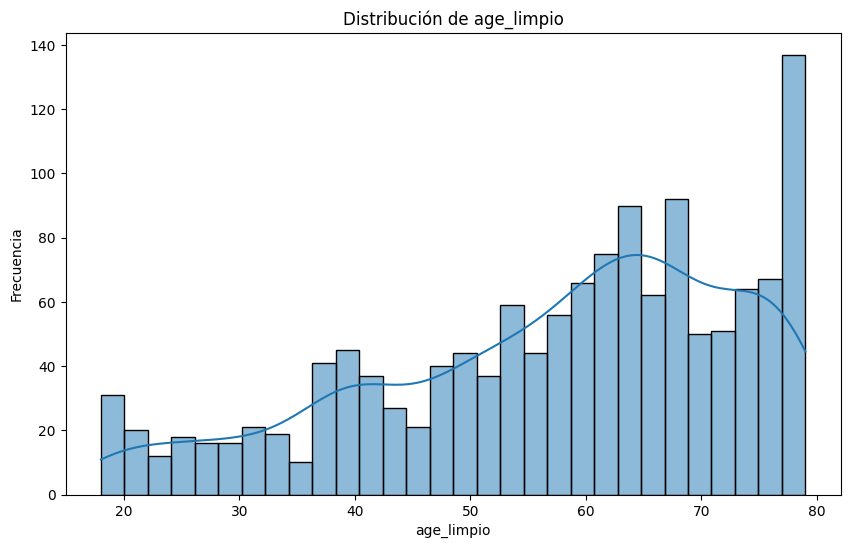

In [40]:
age = df_toyota['age_08_04_calculada'].copy()
age_limpio, mask_age = limpiar_outliers_z_core(age)
print('Cantidad de outliers:', len(age) - len(age_limpio))
histogram(age_limpio,'age_limpio')

## KM

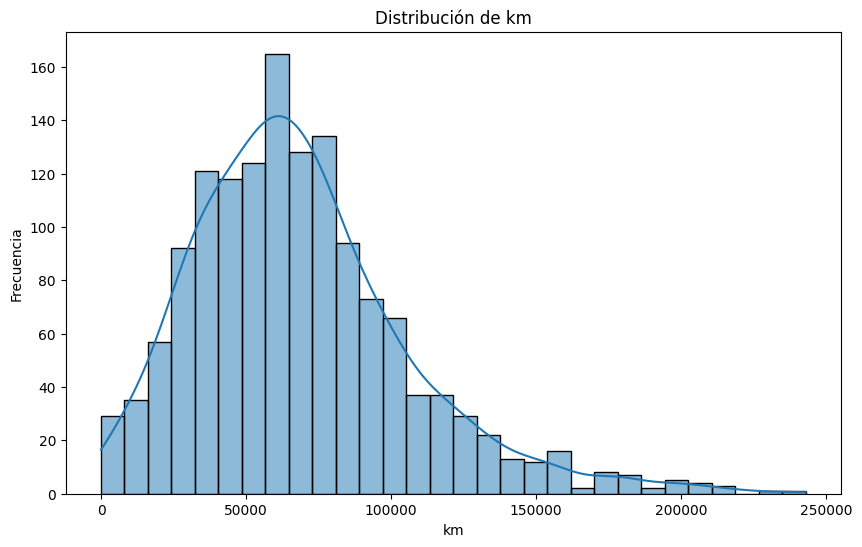

In [41]:
histogram(df_toyota['km'],'km')

Cantidad de outliers: 64


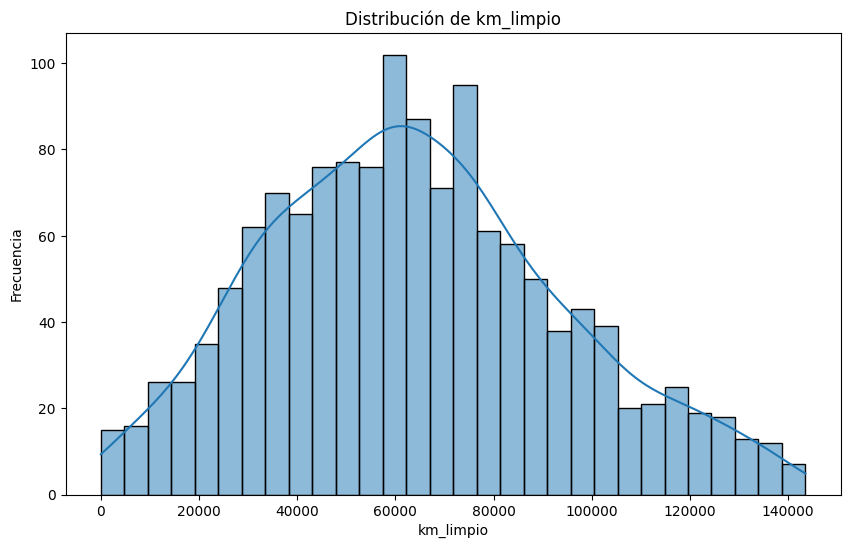

In [42]:
km = df_toyota['km'].copy()
km_limpio, mask_km = limpiar_outliers_z_core(km)
print('Cantidad de outliers:', len(km) - len(km_limpio))
histogram(km_limpio,'km_limpio')

# cc

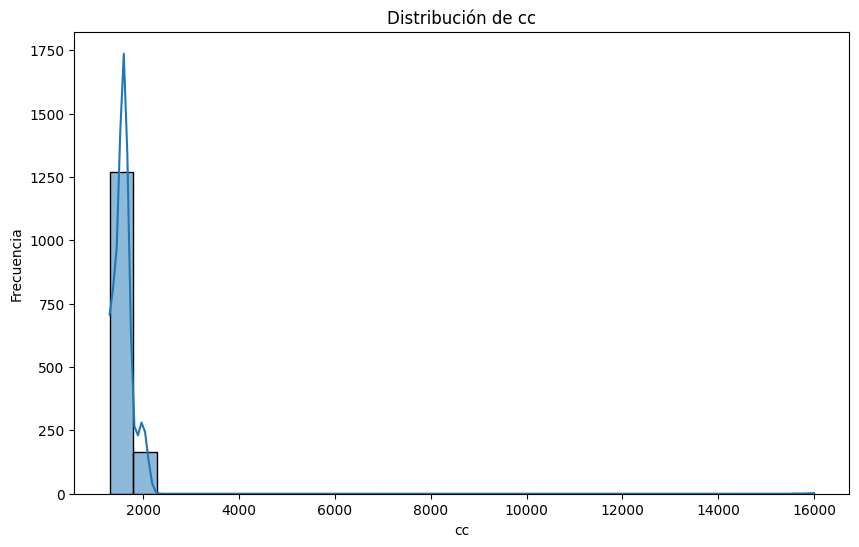

In [43]:
cc = df_toyota['cc'].copy()
histogram(cc,'cc')

Cantidad de outliers: 1


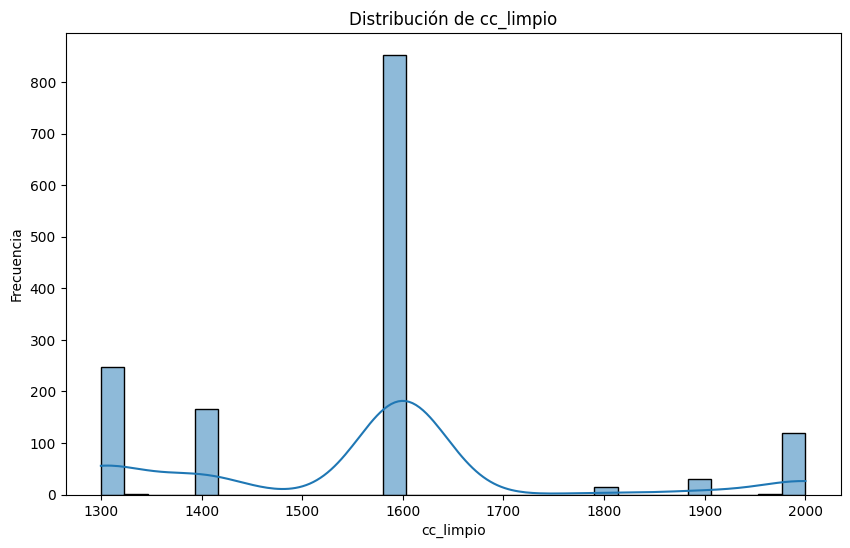

In [44]:
cc_limpio, mask_cc = limpiar_outliers_z_core(cc)
print('Cantidad de outliers:', len(cc) - len(cc_limpio))
histogram(cc_limpio,'cc_limpio')

## quartely tax

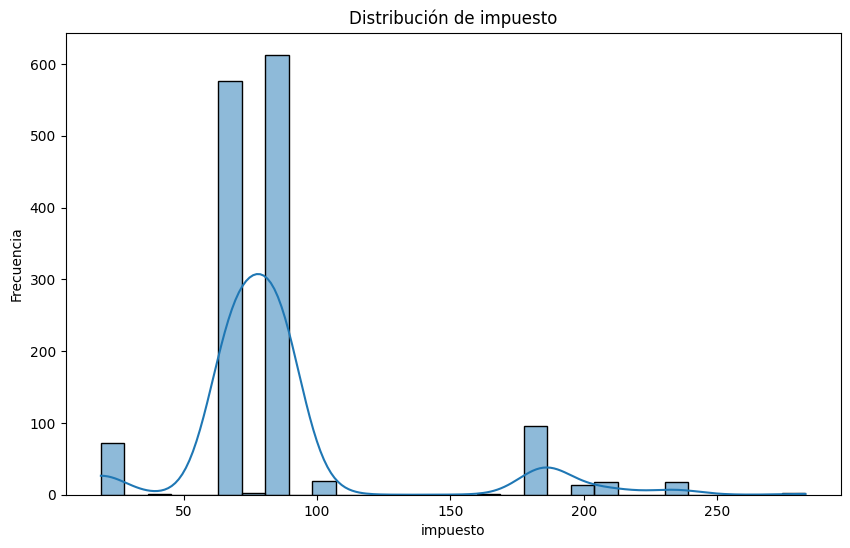

In [45]:
impuesto = df_toyota['quarterly_tax'].copy()
histogram(impuesto,'impuesto')

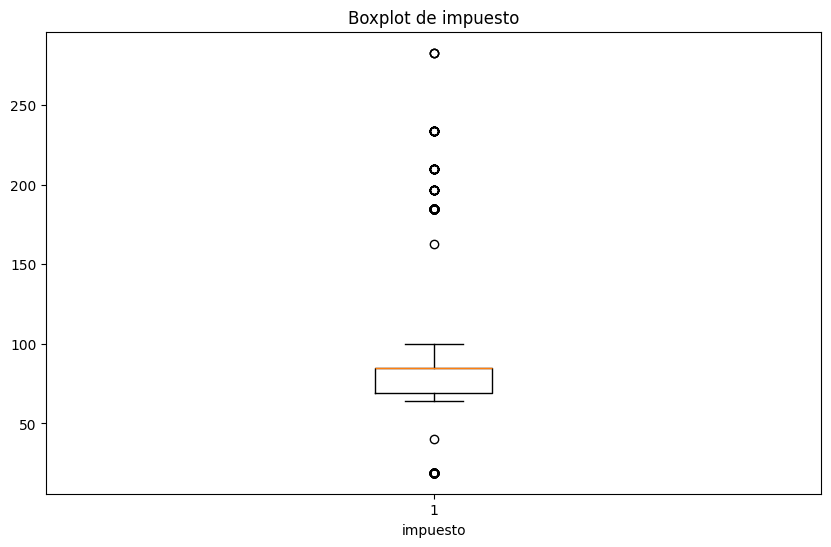

In [46]:
boxplot(impuesto,'impuesto')

Cantidad de outliers: 53


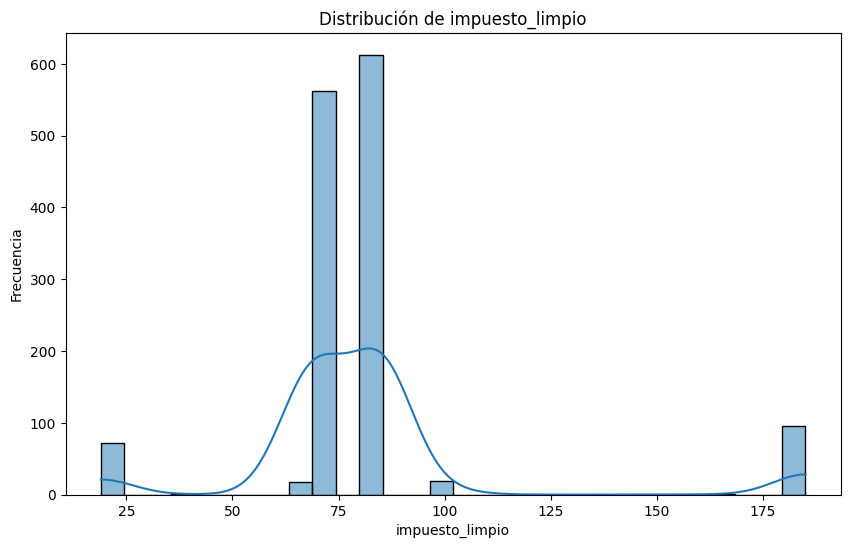

In [47]:
impuesto_limpio, mask_impuesto = limpiar_outliers_z_core(impuesto,2.5)
print('Cantidad de outliers:', len(impuesto) - len(impuesto_limpio))
histogram(impuesto_limpio,'impuesto_limpio')

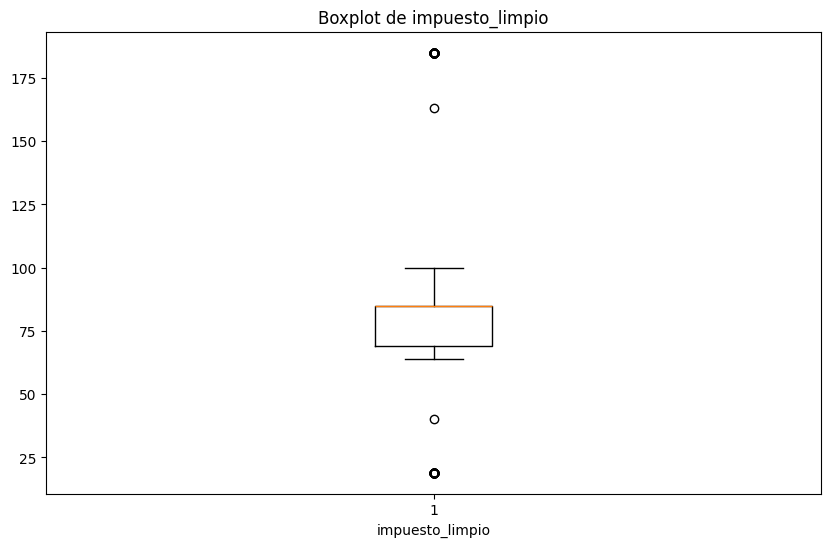

In [48]:
boxplot(impuesto_limpio,'impuesto_limpio')

# Seleccion de feature

Copiamos el dataframe que venimos trabjando con el nombre **df_toyota_1** para poder hacerle los cambios pertinentes y no modificar el original.

In [64]:
df_toyota_1= df_toyota.copy()

df_toyota_1.columns

Index(['price', 'mfg_month', 'mfg_year', 'km', 'fuel_type', 'hp', 'met_color',
       'automatic', 'cc', 'doors', 'gears', 'quarterly_tax', 'weight',
       'mfr_guarantee', 'bovag_guarantee', 'guarantee_period', 'abs',
       'airbag_1', 'airbag_2', 'airco', 'automatic_airco', 'boardcomputer',
       'cd_player', 'central_lock', 'powered_windows', 'power_steering',
       'radio', 'mistlamps', 'sport_model', 'backseat_divider', 'metallic_rim',
       'radio_cassette', 'tow_bar', 'age_08_04_calculada',
       'fuel_type_encoded'],
      dtype='object')

- Eliminamoslas varaibles mencionada en el `analisis bivariado` para evitar multicoliniealidad

- eliminaremos `mfg_month` puesto que es una variable que no nos sirve porque ya esta contemplada en `age_08_04_calculada`

- la variable `weight` tambien se va ya que no es importante para definir el precio de un vehiculo

In [ ]:
df_toyota_1.drop(columns=[ 'mfg_month', 'mfg_year', 'met_color', 'automatic', 'gears', 'weight', 'bovag_guarantee', 'abs', 'airbag_1', 'airbag_2', 'power_steering', 'radio', 'backseat_divider', 'metallic_rim', 'radio_cassette', 'tow_bar','fuel_type'], axis=1,inplace=True)

In [66]:
df_toyota_1

,price,km,hp,met_color,automatic,cc,doors,gears,quarterly_tax,mfr_guarantee,...,powered_windows,power_steering,radio,mistlamps,sport_model,backseat_divider,metallic_rim,tow_bar,age_08_04_calculada,fuel_type_encoded
0,13500.0,46986.0,90,1,0,2000,3,5,210.0,0,...,1,1,0,0,0,1,0,0,22,1
1,13750.0,72937.0,90,1,0,2000,3,5,210.0,0,...,0,1,0,0,0,1,0,0,22,1
2,13950.0,41711.0,90,1,0,2000,3,5,210.0,1,...,0,1,0,0,0,1,0,0,23,1
3,14950.0,48000.0,90,0,0,2000,3,5,210.0,1,...,0,1,0,0,0,1,0,0,25,1
4,13750.0,38500.0,90,0,0,2000,3,5,210.0,1,...,1,1,0,1,0,1,0,0,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500.0,20544.0,86,1,0,1300,3,5,69.0,1,...,1,1,0,1,1,1,0,0,68,2
1432,10845.0,19000.0,86,0,0,1300,3,5,69.0,0,...,0,1,0,0,1,1,0,0,71,2
1433,8500.0,17016.0,86,0,0,1300,3,5,69.0,0,...,0,1,0,0,0,1,0,0,70,2
1434,7250.0,16916.0,86,1,0,1300,3,5,69.0,1,...,0,0,0,0,0,1,0,0,69,2


In [67]:
_ , mask_df_price = limpiar_outliers_z_core(df_toyota_1['price'])
_ , mask_df_age = limpiar_outliers_z_core(df_toyota_1['age_08_04_calculada'])
_ , mask_df_km = limpiar_outliers_z_core(df_toyota_1['km'])
_ , mask_df_cc = limpiar_outliers_z_core(df_toyota_1['cc'])

In [68]:
df_toyota_1 = df_toyota_1[mask_df_price & mask_df_age & mask_df_km & mask_df_cc]

In [ ]:
mostrar_matriz_correlacion(df_toyota_1)

In [ ]:
obtener_correlaciones_target(df_toyota_1.corr(), 'price')

In [ ]:
pares_correlacion_altas(df_toyota_1.corr(),0.60)

- `central_lock` y `powered_windows` se puede que estas variables tienen una alta correlacion por o tanto debemos eliminar una de ellas para evitar la multicolinealidad entre variables la variabel que mas aporte a la target es `powered_windowd` por lo tanto eliminamos `central_lock`

- `quartely_tax ` y `fuel_type_encondig`  mismo criterio nos quedamos con la primera 


- `age_08_04_calcualda ` y `boardcomputer`  mismo criterio nos quedamos con la primera 


- `quartely_tax ` y `cc`  mismo criterio nos quedamos con la primera 



In [ ]:
df_toyota_1.drop(columns=['fuel_type_encoded','boardcomputer','cc','powered_windows'], axis=1,inplace=True)

In [ ]:
import os
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)
csv_path = os.path.join(output_dir, "dataset_clean.csv")
df_toyota_1.to_csv(csv_path, index=False)